<div style="text-align: left;">
    <img src="Images/cct.png" style="width: 90%; margin: 0; display: block;" />
</div>

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>Harnessing the power of data: </h1>
    <h2>Enhancing ecommerce security through analytics </h2>
</div>


<div style="text-align: justify;">
            The term "e-commerce” describes “the process of buying, selling, or exchanging products, services, or information via computer”. It has revolutionized business by providing unmatched accessibility, convenience, and global reach. The exponential growth in e-commerce, driven by mobile devices and internet access, is disrupting traditional retail paradigms. In response to security needs, credit card networks like Visa and Mastercard introduced Strong Customer Authentication (SCA) with the 3-D Secure (3DS) flow, adding identity verification steps.
</div>
    <div style="text-align: justify;">
            While SCA enhances security, it often leads to cart abandonment, with nearly 30% of incomplete purchases attributed to 3DS friction. This highlights the need for solutions that balance security and user experience. By analyzing the vast data collected during online shopping, patterns can be identified to potentially replace additional authentication steps.
    </div>
<div style="text-align: justify;">
            This research uses 3DS (authentication) data from TSYS Ltd. to develop a machine learning model for predicting transaction outcomes aiming to enhance security and consumer satisfaction.
</div>



**🔎 Objectives:**

* Gain a comprehensive understanding of Strong Customer Authentication (SCA) and the 3-D Secure (3DS) flow, including their roles and impacts on e-commerce transactions.

* Learn to develop and implement machine learning algorithms, including neural networks, to predict the outcomes of e-commerce transactions.

* Explore techniques to improve the models. 


**📊 Dataset:**

The file is in csv format and it consists of the following columns: 

* `AUTH_CDT`: date of the transaction
* `MERCH_CAT_CD`: merchant category code
* `TRAN_FRAUD`: fraudulent transaction
* `ZIP_CD`: zip code
* `ECI_IND`: ECI code
* `APPROVED_AMT`: approved amount
* `DECLINE_RES1`: decline code
* `AUTH_CD`: authorisation code
* `TSYS_PROD_CD`: internal identifier
* `ADFLAG`: final result of the transaction after challenge is presented to consumer - the 3DS flow 

**📚Libraries:**

- **Numpy**: Facilitates efficient numerical computations.
- **Pandas**: Offers a convenient interface for working with dataframes, simplifying various data operations.
- **Matplotlib**: Provides a framework for creating plots similar to MATLAB.
- **Seaborn**: A visualization library built on Matplotlib, offering a high-level interface for creating visually appealing statistical graphics.
- **Statsmodels**: Supplies functions and classes for performing statistical tests and building statistical models.
- **Sklearn**: A comprehensive library for data mining, data analysis, and machine learning in Python.
- **Plotly**: Used for creating interactive visualizations. 
- **SciPy**: Used for scientific and technical computing. It builds on top of NumPy, offering more advanced mathematical functions, optimization routines, integration, and statistical methods. 
- **Imbalanced-learn**: Used to handle imbalanced datasets, where one class heavily outweighs the other (e.g., fraud detection). It provides techniques like oversampling (e.g., SMOTE) and undersampling to balance the dataset. 
- **TensorFlow**: Used for building and training complex machine learning models, including neural networks. 

In [1]:
import warnings
warnings.filterwarnings("ignore") 
# This command ignores the warning

from __future__  import print_function # adds compatibility with new versions of Python
%matplotlib inline 
# it needs to have two underscore for 'future', if not it throws an error: 
# ModuleNotFoundError: No module named '_future_'

# Importing the libraries
# More libraries will be added as needed
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>1. Exploratory Data Analysis</h1>
</div>


<div style="text-align: justify;">
    This section presents an Exploratory Data Analysis (EDA) conducted on the 3-D Secure (3DS) data obtained from TSYS Ltd. EDA constitutes a fundamental phase in data science projects, as it facilitates the understanding of underlying patterns, relationships, and anomalies within the dataset. The primary objective of performing EDA is to unveil insights that will inform the development of a machine learning model aimed at predicting transaction outcomes and optimizing the e-commerce checkout process.
</div>

<div style="text-align: justify;">
    The analysis will start with an examination of the dataset's structure and summary statistics to establish an initial comprehension of its characteristics. This process involves identifying the types of variables, their distributions, and any missing or outlier values. Visualizations will be employed to provide an intuitive representation of trends and correlations within the data.
</div>

<div style="text-align: justify;">
    Through this thorough exploration, it is anticipated that key features influencing transaction success and failure will be identified. These insights are crucial for constructing an effective predictive model. The findings from the EDA will guide the feature selection and engineering processes, thereby contributing to the development of a robust and accurate machine learning solution.
</div>


**1.1 Dataset**

Let's load the dataset. 

In [2]:
data = pd.read_csv('scadata.csv')

In [3]:
data.head()

AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
0  2023-12-20          5967          N    NaN        0           0.0   
1  2023-12-20          5967          N    NaN        0           0.0   
2  2023-12-20          5967          N    NaN        0           0.0   
3  2023-12-20          5967          N    NaN        0           0.0   
4  2023-12-20          5967          N    NaN        0           0.0   

   DECLINE_RES1 AUTH_CD TSYS_PROD_CD   ADFLAG  
0         103.0       0          NaN  decline  
1         103.0       0          NaN  decline  
2         103.0       0          NaN  decline  
3         103.0       0          NaN  decline  
4         103.0       0          NaN  decline

- The head(..) function in pandas provides a preview of the dataset by displaying the first few rows. Overall, the dataset is well-organized, though there are some values that might require adjustment.

**1.1.1 Shape**

In [4]:
print("Shape of Transactions dataset: {}".format(data.shape))
print("Column headers/names: {}".format(list(data.columns)))

Shape of Transactions dataset: (10000, 10)
Column headers/names: ['AUTH_CDT', 'MERCH_CAT_CD', 'TRAN_FRAUD', 'ZIP_CD', 'ECI_IND', 'APPROVED_AMT', 'DECLINE_RES1', 'AUTH_CD', 'TSYS_PROD_CD', 'ADFLAG']


- From above lines we can learn that there are total _10000 observations with 10 different feature variables/attributes_ present in the dataset.

**1.1.2 Info**

In [5]:
# Now, let's check the information about different variables/column from the dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AUTH_CDT      10000 non-null  object 
 1   MERCH_CAT_CD  10000 non-null  int64  
 2   TRAN_FRAUD    10000 non-null  object 
 3   ZIP_CD        9862 non-null   object 
 4   ECI_IND       10000 non-null  int64  
 5   APPROVED_AMT  10000 non-null  float64
 6   DECLINE_RES1  9882 non-null   float64
 7   AUTH_CD       10000 non-null  object 
 8   TSYS_PROD_CD  9862 non-null   object 
 9   ADFLAG        10000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


<div style="text-align: justify;">
    The dataset comprises primarily coded values, with the exception of one true float value, the approved amount. The remaining attributes are codes used to categorize various aspects of transactions. Specifically, the <strong>MCC (Merchant Category Code)</strong> represents different merchant categories, while the <strong>Decline Result</strong> code indicates the final outcome of a transaction. Each transaction is associated with a code regardless of its result. The <strong>ECI (Electronic Commerce Indicator)</strong>, returned during authentication, varies depending on the card scheme—such as Visa, Mastercard, or American Express. Although card numbers are not included in the dataset for security reasons, see below a table of ECI codes from respective schemes:
</div>


<div style="text-align: left;">
    <img src="Images/visa.png" style="width: 70%; margin: 0; display: block;" />
</div>

<div style="text-align: left;">
    <img src="Images/mastercard.png" style="width: 70%; margin: 0; display: block;" />
</div>

<div style="text-align: left;">
    <img src="Images/amex.png" style="width: 70%; margin: 0; display: block;" />
</div>

**1.1.3 Missing Values**

Let's look for the missing values in the dataset.

In [6]:
print(data.isnull().sum())

AUTH_CDT          0
MERCH_CAT_CD      0
TRAN_FRAUD        0
ZIP_CD          138
ECI_IND           0
APPROVED_AMT      0
DECLINE_RES1    118
AUTH_CD           0
TSYS_PROD_CD    138
ADFLAG            0
dtype: int64


In [7]:
# Percentage of the missing values in the dataset
total_rows = len(data)
missing_values = data['ZIP_CD'].isna().sum()
percentage_missing = (missing_values / total_rows) * 100
print(f"Percentage of missing values in 'ZIP_CD' column: {percentage_missing:.2f}%")

Percentage of missing values in 'ZIP_CD' column: 1.38%


In [8]:
# Percentage of the missing values in the dataset
total_rows = len(data)
missing_values = data['DECLINE_RES1'].isna().sum()
percentage_missing = (missing_values / total_rows) * 100
print(f"Percentage of missing values in 'DECLINE_RES1' column: {percentage_missing:.2f}%")

Percentage of missing values in 'DECLINE_RES1' column: 1.18%


In [9]:
# Percentage of the missing values in the dataset
total_rows = len(data)
missing_values = data['TSYS_PROD_CD'].isna().sum()
percentage_missing = (missing_values / total_rows) * 100
print(f"Percentage of missing values in 'TSYS_PROD_CD' column: {percentage_missing:.2f}%")

Percentage of missing values in 'TSYS_PROD_CD' column: 1.38%


In [10]:
data = data.dropna()

- Since the percentage is small, the missing values will be eliminated from the dataset. 

**1.2 Descriptive Statistics**

Descriptive statistics involves summarizing and organizing data to provide a clear overview of its main characteristics. It includes measures like mean, median, mode, and standard deviation, which help to describe and understand the data's central tendency, spread, and overall distribution.

**1.2.1 Describe**

In [11]:
data.describe()

MERCH_CAT_CD      ECI_IND  APPROVED_AMT  DECLINE_RES1
count   9744.000000  9744.000000   9744.000000   9744.000000
mean    5633.081486     2.666154     68.343280   1657.462541
std     1103.872473     3.022903    251.533553   3473.958646
min      742.000000     0.000000      0.000000      0.000000
25%     4816.000000     0.000000      4.600000      0.000000
50%     5732.000000     0.000000     20.000000      0.000000
75%     5818.000000     6.000000     56.975000      0.000000
max     9406.000000     7.000000   8920.350000   9044.000000

- As mentioned before, apart from the feature `APPROVED_AMOUNT`, all the other features are codes and not necessarily numbers. 

In [12]:
# The dataset contains a single meaningful integer value for analysis: APPROVED_AMT.
column_description = data['APPROVED_AMT'].describe()
print(column_description)

count    9744.000000
mean       68.343280
std       251.533553
min         0.000000
25%         4.600000
50%        20.000000
75%        56.975000
max      8920.350000
Name: APPROVED_AMT, dtype: float64


In [13]:
# The function describe doesn't give the mode, so I am calculating separately
mode_value = data['APPROVED_AMT'].mode().iloc[0]
print("Mode of APPROVED_AMT:", mode_value)
#no need to plot it too as it is one value. 

Mode of APPROVED_AMT: 0.0


**1.2.2 Descriptive Statistics Table**

In [14]:
import plotly.graph_objects as go

# Values taken from the describe() and the mode calculation.
statistics = {
    "Count": 9744,
    "Mean": 68.343280,
    "Std": 251.533553,
    "Min": 0.0,
    "25%": 4.60,
    "50%": 20.0,
    "75%": 56.975,
    "Max": 8920.35,
    "Mode": 0
}

statistic_names = list(statistics.keys())
statistic_values = list(statistics.values())

fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Statistics", "Values"],
        font=dict(size=18, color='#0D1821'),  
        fill=dict(color='#F0F4EF')  
    ),
    cells=dict(
        values=[statistic_names, statistic_values],
        font=dict(size=14, color='#0D1821'),  
        fill=dict(color='#F0F4EF')  
    )
)])

fig.update_layout(
    title={
        'text': "Descriptive Statistics Table: APPROVED_AMT",
        'x': 0.5,  
        'xanchor': 'center',  
        'font': dict(size=16, color='#0D1821')  
    },
    margin=dict(l=0, r=0, t=30, b=0),
    font=dict(size=10),
    height=300,
    width=500
)

fig.show()


- **Count**: 9744  
  The total number of data points in the dataset.  

&nbsp;  

- **Mean**: 68.34  
  The average value of the data, calculated as:  

  <div style="text-align: left; margin-top: 10px; margin-bottom: 10px;">  
  $$
  \text{Mean} = \frac{\sum x_i}{N}
  $$  
  </div>  
  where \( x_i \) represents each individual data point and \( N \) is the total number of data points.

&nbsp;  

- **Standard Deviation (Std)**: 251.53  
  A measure of the dispersion or spread of the data around the mean. It is calculated as the square root of the variance:

  <div style="text-align: left; margin-top: 10px; margin-bottom: 10px;">     
    $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$
  </div>  
  where \( x_i \) represents each data point, Mean is the average value, and \( N \) is the number of data points.

&nbsp;  

- **Minimum (Min)**: 0.0  
  The smallest value in the dataset.

&nbsp;  

- **25th Percentile (25%)**: 4.60  
  The value below which 25% of the data falls. This is also known as the first quartile (Q1).

&nbsp;  

- **50th Percentile (50%)**: 20.0  
  The median of the dataset, which is the value below which 50% of the data falls. It divides the dataset into two equal halves.

&nbsp;  

- **75th Percentile (75%)**: 56.98  
  The value below which 75% of the data falls. This is also known as the third quartile (Q3).

&nbsp;  

- **Maximum (Max)**: 8920.35  
  The largest value in the dataset.

&nbsp;  

- **Mode**: 0  
  If the mode of a numerical column is zero, it means that there is no single most frequently occurring value in that column, as seen before the frequency is balanced and there might be multiple values with the same highest frequency, resulting in a tie for the mode. This is a valid result in statistics.


**1.3 Data Distribution**

**1.3.1 AUTH_CDT**

In [15]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['AUTH_CDT'].value_counts()

AUTH_CDT
2023-11-24    199
2023-11-23    163
2023-11-27    147
2023-11-25    138
2023-12-01    135
             ... 
2023-12-20     70
2023-12-25     67
2023-11-02     67
2024-01-06     65
2024-02-01     10
Name: count, Length: 95, dtype: int64

In [16]:
value_counts_auth = data['AUTH_CDT'].value_counts()
relative_frequencies_auth = value_counts_auth / len(data)
print(relative_frequencies_auth)

AUTH_CDT
2023-11-24    0.020423
2023-11-23    0.016728
2023-11-27    0.015086
2023-11-25    0.014163
2023-12-01    0.013855
                ...   
2023-12-20    0.007184
2023-12-25    0.006876
2023-11-02    0.006876
2024-01-06    0.006671
2024-02-01    0.001026
Name: count, Length: 95, dtype: float64


In [17]:
import pandas as pd
import plotly.graph_objects as go

value_counts_auth_cdt = data['AUTH_CDT'].value_counts()

# Bar chart for 'AUTH_CDT'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_auth_cdt.index.astype(str),
        y=value_counts_auth_cdt.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_auth_cdt.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in AUTH_CDT',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='AUTH_CDT',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.2 MERCH_CAT_CD**

In [18]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['MERCH_CAT_CD'].value_counts()

MERCH_CAT_CD
4816    1913
5812     666
4121     620
5814     573
5818     543
        ... 
3034       1
8734       1
5422       1
7538       1
5169       1
Name: count, Length: 182, dtype: int64

In [19]:
value_counts_merch = data['MERCH_CAT_CD'].value_counts()
relative_frequencies_merch = value_counts_merch / len(data)
print(relative_frequencies_merch)

MERCH_CAT_CD
4816    0.196326
5812    0.068350
4121    0.063629
5814    0.058805
5818    0.055727
          ...   
3034    0.000103
8734    0.000103
5422    0.000103
7538    0.000103
5169    0.000103
Name: count, Length: 182, dtype: float64


In [20]:
import pandas as pd
import plotly.graph_objects as go

value_counts_merch_cat_cd = data['MERCH_CAT_CD'].value_counts()

# Bar chart for 'MERCH_CAT_CD'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_merch_cat_cd.index.astype(str),
        y=value_counts_merch_cat_cd.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_merch_cat_cd.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in MERCH_CAT_CD',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='MERCH_CAT_CD',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.3 TRAN_FRAUD**

In [21]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['TRAN_FRAUD'].value_counts()

TRAN_FRAUD
N    9718
Y      21
U       5
Name: count, dtype: int64

In [22]:
value_counts_tran = data['TRAN_FRAUD'].value_counts()
relative_frequencies_tran = value_counts_tran / len(data)
print(relative_frequencies_tran)

TRAN_FRAUD
N    0.997332
Y    0.002155
U    0.000513
Name: count, dtype: float64


In [23]:
import pandas as pd
import plotly.graph_objects as go

value_counts_tran_fraud = data['TRAN_FRAUD'].value_counts()

# Bar chart for 'TRAN_FRAUD'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_tran_fraud.index.astype(str),
        y=value_counts_tran_fraud.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_tran_fraud.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in TRAN_FRAUD',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='TRAN_FRAUD',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=0),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.4 ZIP_CD**

In [24]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['ZIP_CD'].value_counts()

ZIP_CD
K1H6P    209
T4C0V    204
M4Y3C    173
M3L1P    173
H2V2A    171
        ... 
L3R0S      1
M5B0A      1
L4B0G      1
M3J3S      1
L8W3T      1
Name: count, Length: 348, dtype: int64

In [25]:
value_counts_zip = data['ZIP_CD'].value_counts()
relative_frequencies_zip = value_counts_zip / len(data)
print(relative_frequencies_zip)

ZIP_CD
K1H6P    0.021449
T4C0V    0.020936
M4Y3C    0.017755
M3L1P    0.017755
H2V2A    0.017549
           ...   
L3R0S    0.000103
M5B0A    0.000103
L4B0G    0.000103
M3J3S    0.000103
L8W3T    0.000103
Name: count, Length: 348, dtype: float64


In [26]:
import pandas as pd
import plotly.graph_objects as go

value_counts_zip_cd = data['ZIP_CD'].value_counts()

# Bar chart for 'ZIP_CD'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_zip_cd.index.astype(str),
        y=value_counts_zip_cd.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_zip_cd.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in ZIP_CD',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='ZIP_CD',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.5 ECI_IND**

In [27]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['ECI_IND'].value_counts()

ECI_IND
0    5183
6    2917
7    1038
2     605
1       1
Name: count, dtype: int64

In [28]:
value_counts_eci = data['ECI_IND'].value_counts()
relative_frequencies_eci = value_counts_eci / len(data)
print(relative_frequencies_eci)

ECI_IND
0    0.531917
6    0.299364
7    0.106527
2    0.062089
1    0.000103
Name: count, dtype: float64


In [29]:
import pandas as pd
import plotly.graph_objects as go

value_counts_eci_ind = data['ECI_IND'].value_counts()

# Bar chart for 'ECI_IND'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_eci_ind.index.astype(str),
        y=value_counts_eci_ind.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_eci_ind.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in ECI_IND',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='ECI_IND',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=0),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()

**1.3.6 APPROVED_AMT**

In [30]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['APPROVED_AMT'].value_counts()

APPROVED_AMT
0.00      1599
2.00       216
25.00       78
11.29       74
10.00       66
          ... 
86.91        1
595.00       1
313.13       1
56.70        1
12.68        1
Name: count, Length: 4254, dtype: int64

In [31]:
value_counts_amt = data['APPROVED_AMT'].value_counts()
relative_frequencies_amt = value_counts_amt / len(data)
print(relative_frequencies_amt)

APPROVED_AMT
0.00      0.164101
2.00      0.022167
25.00     0.008005
11.29     0.007594
10.00     0.006773
            ...   
86.91     0.000103
595.00    0.000103
313.13    0.000103
56.70     0.000103
12.68     0.000103
Name: count, Length: 4254, dtype: float64


In [32]:
import pandas as pd
import plotly.graph_objects as go

value_counts_approved_amt = data['APPROVED_AMT'].value_counts()

# Bar chart for 'APPROVED_AMT'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_approved_amt.index.astype(str),
        y=value_counts_approved_amt.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_approved_amt.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in APPROVED_AMT',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='APPROVED_AMT',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.7 DECLINE_RES1**

In [33]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['DECLINE_RES1'].value_counts()

DECLINE_RES1
0.0       7512
8997.0    1218
9004.0     483
48.0       152
505.0       89
560.0       74
124.0       68
9009.0      24
500.0       14
9011.0      13
85.0        12
7.0         11
9007.0       9
9010.0       8
9019.0       7
207.0        7
321.0        6
86.0         5
9022.0       4
14.0         4
9044.0       4
42.0         3
9006.0       3
9023.0       3
43.0         2
9014.0       2
84.0         1
9024.0       1
530.0        1
9026.0       1
9017.0       1
44.0         1
7015.0       1
Name: count, dtype: int64

In [34]:
value_counts_dec = data['DECLINE_RES1'].value_counts()
relative_frequencies_dec = value_counts_dec / len(data)
print(relative_frequencies_dec)

DECLINE_RES1
0.0       0.770936
8997.0    0.125000
9004.0    0.049569
48.0      0.015599
505.0     0.009134
560.0     0.007594
124.0     0.006979
9009.0    0.002463
500.0     0.001437
9011.0    0.001334
85.0      0.001232
7.0       0.001129
9007.0    0.000924
9010.0    0.000821
9019.0    0.000718
207.0     0.000718
321.0     0.000616
86.0      0.000513
9022.0    0.000411
14.0      0.000411
9044.0    0.000411
42.0      0.000308
9006.0    0.000308
9023.0    0.000308
43.0      0.000205
9014.0    0.000205
84.0      0.000103
9024.0    0.000103
530.0     0.000103
9026.0    0.000103
9017.0    0.000103
44.0      0.000103
7015.0    0.000103
Name: count, dtype: float64


In [35]:
import pandas as pd
import plotly.graph_objects as go

value_counts_decline_res1 = data['DECLINE_RES1'].value_counts()

# Bar chart for 'DECLINE_RES1'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_decline_res1.index.astype(str),
        y=value_counts_decline_res1.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_decline_res1.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in DECLINE_RES1',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='DECLINE_RES1',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.8 AUTH_CD**

In [36]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['AUTH_CD'].value_counts()

AUTH_CD
0         444
08452E      6
06772E      6
03165E      6
08798E      6
         ... 
05579E      1
07331E      1
08353E      1
01208E      1
06992E      1
Name: count, Length: 5964, dtype: int64

In [37]:
value_counts_cd = data['AUTH_CD'].value_counts()
relative_frequencies_cd = value_counts_cd / len(data)
print(relative_frequencies_cd)

AUTH_CD
0         0.045567
08452E    0.000616
06772E    0.000616
03165E    0.000616
08798E    0.000616
            ...   
05579E    0.000103
07331E    0.000103
08353E    0.000103
01208E    0.000103
06992E    0.000103
Name: count, Length: 5964, dtype: float64


In [38]:
import pandas as pd
import plotly.graph_objects as go

value_counts_auth_cd = data['AUTH_CD'].value_counts()

# Bar chart for 'AUTH_CD'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_auth_cd.index.astype(str),
        y=value_counts_auth_cd.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_auth_cd.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in AUTH_CD',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='AUTH_CD',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=-45),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.9 TSYS_PROD_CD**

In [39]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['TSYS_PROD_CD'].value_counts()

TSYS_PROD_CD
MW    9744
Name: count, dtype: int64

In [40]:
value_counts_tsys = data['TSYS_PROD_CD'].value_counts()
relative_frequencies_tsys = value_counts_tsys / len(data)
print(relative_frequencies_tsys)

TSYS_PROD_CD
MW    1.0
Name: count, dtype: float64


In [41]:
import pandas as pd
import plotly.graph_objects as go

value_counts_tsys_prod_cd = data['TSYS_PROD_CD'].value_counts()

# Bar chart for 'TSYS_PROD_CD'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_tsys_prod_cd.index.astype(str),
        y=value_counts_tsys_prod_cd.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_tsys_prod_cd.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in TSYS_PROD_CD',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='TSYS_PROD_CD',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=0),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.3.10 ADFLAG**

In [42]:
# Calculate the frequency of each category to understand how often each category appears in the dataset. 
#value_counts() in Python for this purpose.
data['ADFLAG'].value_counts()

ADFLAG
approved    8145
decline     1599
Name: count, dtype: int64

In [43]:
value_counts_ad = data['ADFLAG'].value_counts()
relative_frequencies_ad = value_counts_ad / len(data)
print(relative_frequencies_ad)

ADFLAG
approved    0.835899
decline     0.164101
Name: count, dtype: float64


In [44]:
import pandas as pd
import plotly.graph_objects as go

value_counts_adflag = data['ADFLAG'].value_counts()

# Bar chart for 'ADFLAG'
fig = go.Figure(data=[
    go.Bar(
        x=value_counts_adflag.index.astype(str),
        y=value_counts_adflag.values,
        marker=dict(color='#B4CDED'),
        text=[f'{val}' for val in value_counts_adflag.values],
        textposition='auto'
    )
])

# Layout 
fig.update_layout(
    title=dict(
        text='Frequency of Values in ADFLAG',
        font=dict(color='#0D1821'),
        x=0.5,
        xanchor='center'
    ),
    xaxis_title='ADFLAG',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821', tickangle=0),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

fig.show()


**1.4 Skewness**

<p>Plots are helpful for visualizing the distribution of a dataset. It shows whether the distribution is skewed to the left, right, or symmetrical.

In [45]:
from scipy.stats import skew

# Numerical features in the dataset
numerical_features = ['APPROVED_AMT']

# Skewness for each numerical feature
skewness_results = {}
for feature in numerical_features:
    skewness_results[feature] = skew(data[feature].dropna())

for feature, skew_value in skewness_results.items():
    print(f'Skewness of {feature}: {skew_value:.4f}')

Skewness of APPROVED_AMT: 16.6454


- The skewness of the `APPROVED_AMT` feature is 16.6454, indicating a strong right skew. This means that the distribution of the `APPROVED_AMT` values has a long tail on the right side, with a few extremely high values compared to the majority of the data.

Skewness is calculated using the third standardized moment of the distribution. The formula is:

$$
\tilde{\mu}_{3} = \frac{\sum_{i=1}^{N}\left(X_{i} - \bar{X}\right)^{3}}{(N - 1) \cdot \sigma^{3}}
$$

Where:

- $N$ is the number of observations.
- $X_{i}$ represents each individual data point.
- $\bar{X}$ is the mean of the data.
- $\sigma$ is the standard deviation of the data.



For `APPROVED_AMT`:
- The skewness value of **16.6454** indicates a significant right skew, meaning that the majority of values are clustered towards the lower end with a few high values extending the tail to the right.

In [46]:
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import numpy as np

approved_amt = data['APPROVED_AMT'].dropna()

# Histogram
hist = go.Histogram(
    x=approved_amt,
    nbinsx=30,
    marker=dict(color='#B4CDED'),
    opacity=0.75
)

# KDE line
kde_x = np.linspace(approved_amt.min(), approved_amt.max(), 500)
kde_y = stats.gaussian_kde(approved_amt)(kde_x)

kde_line = go.Scatter(
    x=kde_x,
    y=kde_y * len(approved_amt) * (approved_amt.max() - approved_amt.min()) / 30,
    mode='lines',
    line=dict(color='#0D1821', width=2),
    name='KDE'
)

layout = go.Layout(
    title=dict(
        text='Skewness Visualization: APPROVED_AMT',
        font=dict(color='#0D1821'),
        x=0.5, 
        xanchor='center'
    ),
    xaxis_title='APPROVED_AMT',
    yaxis_title='Frequency',
    xaxis=dict(color='#0D1821'),
    yaxis=dict(color='#0D1821'),
    showlegend=False
)

skew_value = skewness_results['APPROVED_AMT']
layout.annotations = [
    dict(
        x=0.95, 
        y=0.9, 
        xref='paper', 
        yref='paper',
        text=f'Skewness: {skew_value:.4f}',
        showarrow=False,
        font=dict(size=12, color='#0D1821'),
        xanchor='right',
        yanchor='top'
    )
]

fig = go.Figure(data=[hist, kde_line], layout=layout)
fig.show()


**1.5 Kurtosis**


In [47]:
import pandas as pd
from scipy import stats

# Numerical features in the dataset
numerical_features = ['APPROVED_AMT']

# Dictionary to store kurtosis results
kurtosis_results = {}

# Compute kurtosis for each numerical feature
for feature in numerical_features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    kurtosis_value = stats.kurtosis(data[feature].dropna(), nan_policy='omit')
    
    kurtosis_results[feature] = kurtosis_value

for feature, kurtosis_value in kurtosis_results.items():
    print(f"Kurtosis of {feature}: {kurtosis_value:.2f}")


Kurtosis of APPROVED_AMT: 409.22


- A kurtosis value of **409.22** for the `APPROVED_AMT` indicates an extremely high level of peakedness in the distribution. This suggests that the `APPROVED_AMT` data has very heavy tails and extreme outliers. In practical terms, this means that the distribution has many values far from the mean, which is indicative of a highly skewed dataset.

The kurtosis of a dataset is calculated using the following formula:

$$
\text{Kurtosis} = \frac{N \cdot \sum_{i=1}^{N} (x_i - \bar{x})^4}{( \sum_{i=1}^{N} (x_i - \bar{x})^2 )^2} - 3
$$

where:
- $N$ is the number of observations.
- $x_i$ represents each individual data point.
- $\bar{x}$ is the mean of the data.

**Kurtosis** measures the "tailedness" of the probability distribution of a real-valued random variable. It provides insight into the shape of the distribution, specifically how outlier-prone it is. High kurtosis indicates heavy tails and more outliers, while low kurtosis suggests lighter tails and fewer outliers.



**1.6 Outliers**

- Quartile technique is the division of a dataset into quartiles, each representing 25% of the data. 
The lower quartile (Q1) marks the 25th percentile, while the upper quartile (Q3) represents the 75th percentile. 

- The interquartile range (IQR) is then calculated as the difference between Q3 and Q1. 

- Outliers are typically identified as values that fall below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR. 


In [48]:
Q1 = data['APPROVED_AMT'].quantile(0.25)
Q3 = data['APPROVED_AMT'].quantile(0.75)
IQR = Q3 - Q1

In [49]:
print(IQR)

52.375


In [50]:
# The most commonly used multiplier is 1.5, which is considered a moderate level of sensitivity. 
# This means that values that fall below 1.5 times the IQR below the first quartile (Q1) 
# or above 1.5 times the IQR above the third quartile (Q3) are considered outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [51]:
outliers = data[(data['APPROVED_AMT'] < lower_bound) | (data['APPROVED_AMT'] > upper_bound)]
print(outliers)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
157   2023-11-13          3000          N  89434        0        232.20   
159   2023-11-30          6300          N  89434        0        239.58   
168   2023-11-14          4814          N  J9J3M        0        194.69   
170   2023-11-19          4899          N  J9J3M        7        137.96   
180   2023-12-03          4816          N  J9J3M        0        194.00   
...          ...           ...        ...    ...      ...           ...   
9924  2024-01-06          4816          N  K1H6P        6        570.54   
9925  2024-01-06          4816          N  K1H6P        6        143.50   
9928  2024-01-08          5921          N  K1H6P        7        349.00   
9931  2024-01-10          5995          N  K1H6P        7        276.85   
9960  2024-01-27          5691          N  K1H6P        6        264.43   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD    ADFLAG  
157         8997.0  08027E           MW  approv

In [52]:
# Ouliers plot: Scatterplot with a trend line
import plotly.express as px
import plotly.graph_objs as go 

fig = px.scatter(outliers, x=outliers.index, y='APPROVED_AMT', title='Outliers: Approved Amount ')
fig.update_layout(title_x=0.5, title_font=dict(size=24))
m, b = np.polyfit(outliers.index, outliers['APPROVED_AMT'], 1)
trend_line = m * outliers.index + b
fig.add_trace(go.Scatter(x=outliers.index, y=trend_line, mode='lines', name='Trend Line', line=dict(color='#0D1821', width=2)))
fig.update_traces(marker=dict(size=8, color='#BFCC94')) 
fig.update_layout(paper_bgcolor='white')
fig.update_xaxes(showgrid=False)  
fig.update_yaxes(showgrid=False)  
fig.show()

In [53]:
outliers.head()

AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
157  2023-11-13          3000          N  89434        0        232.20   
159  2023-11-30          6300          N  89434        0        239.58   
168  2023-11-14          4814          N  J9J3M        0        194.69   
170  2023-11-19          4899          N  J9J3M        7        137.96   
180  2023-12-03          4816          N  J9J3M        0        194.00   

     DECLINE_RES1 AUTH_CD TSYS_PROD_CD    ADFLAG  
157        8997.0  08027E           MW  approved  
159        8997.0  01243E           MW  approved  
168           0.0  00234E           MW  approved  
170           0.0  02736E           MW  approved  
180        8997.0  05598E           MW  approved

In [54]:
import pandas as pd

declined_outliers = outliers[outliers['ADFLAG'] == 'declined']

approved_outliers = outliers[outliers['ADFLAG'] == 'approved']

print("Declined Outliers:")
print(declined_outliers)

print("\nApproved Outliers:")
print(approved_outliers)


Declined Outliers:
Empty DataFrame
Columns: [AUTH_CDT, MERCH_CAT_CD, TRAN_FRAUD, ZIP_CD, ECI_IND, APPROVED_AMT, DECLINE_RES1, AUTH_CD, TSYS_PROD_CD, ADFLAG]
Index: []

Approved Outliers:
        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
157   2023-11-13          3000          N  89434        0        232.20   
159   2023-11-30          6300          N  89434        0        239.58   
168   2023-11-14          4814          N  J9J3M        0        194.69   
170   2023-11-19          4899          N  J9J3M        7        137.96   
180   2023-12-03          4816          N  J9J3M        0        194.00   
...          ...           ...        ...    ...      ...           ...   
9924  2024-01-06          4816          N  K1H6P        6        570.54   
9925  2024-01-06          4816          N  K1H6P        6        143.50   
9928  2024-01-08          5921          N  K1H6P        7        349.00   
9931  2024-01-10          5995          N  K1H6P        7      

In [55]:
#This is just for my understanding of a related feature
import pandas as pd

fraudulent_outliers = outliers[outliers['TRAN_FRAUD'] == 'Y']

nonfraudulent_outliers = outliers[outliers['TRAN_FRAUD'] == 'N']

print("Fraudulent Outliers:")
print(fraudulent_outliers)

print("\nnNon-Fraudulent Outliers:")
print(nonfraudulent_outliers)

Fraudulent Outliers:
Empty DataFrame
Columns: [AUTH_CDT, MERCH_CAT_CD, TRAN_FRAUD, ZIP_CD, ECI_IND, APPROVED_AMT, DECLINE_RES1, AUTH_CD, TSYS_PROD_CD, ADFLAG]
Index: []

nNon-Fraudulent Outliers:
        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
157   2023-11-13          3000          N  89434        0        232.20   
159   2023-11-30          6300          N  89434        0        239.58   
168   2023-11-14          4814          N  J9J3M        0        194.69   
170   2023-11-19          4899          N  J9J3M        7        137.96   
180   2023-12-03          4816          N  J9J3M        0        194.00   
...          ...           ...        ...    ...      ...           ...   
9924  2024-01-06          4816          N  K1H6P        6        570.54   
9925  2024-01-06          4816          N  K1H6P        6        143.50   
9928  2024-01-08          5921          N  K1H6P        7        349.00   
9931  2024-01-10          5995          N  K1H6P      

In [56]:
import numpy as np

median_approved_amt = data.loc[data['ADFLAG'] == 'approved', 'APPROVED_AMT'].median()

# Replace outliers with the median value
data['APPROVED_AMT'] = np.where(
    (data['APPROVED_AMT'] < lower_bound) | (data['APPROVED_AMT'] > upper_bound),
    median_approved_amt,
    data['APPROVED_AMT']
)

In [57]:
outliers1 = data[(data['APPROVED_AMT'] < lower_bound) | (data['APPROVED_AMT'] > upper_bound)]
print(outliers1)

Empty DataFrame
Columns: [AUTH_CDT, MERCH_CAT_CD, TRAN_FRAUD, ZIP_CD, ECI_IND, APPROVED_AMT, DECLINE_RES1, AUTH_CD, TSYS_PROD_CD, ADFLAG]
Index: []


In [58]:
data.shape

(9744, 10)

In [59]:
# Standard deviation
std_deviation = data['APPROVED_AMT'].std()
print("Standard Deviation:", std_deviation)

Standard Deviation: 29.74989210009966


- A standard deviation of **29.74** suggests a moderate amount of dispersion in the `APPROVED_AMT` values around the mean.


I chose to replace the outliers with the median because the median is a robust measure that is not significantly affected by extreme values. The outliers in the dataset were highly extreme and sparse, meaning they didn't appear frequently enough for the model to learn any meaningful patterns from them.


**1.7 Pairplot**

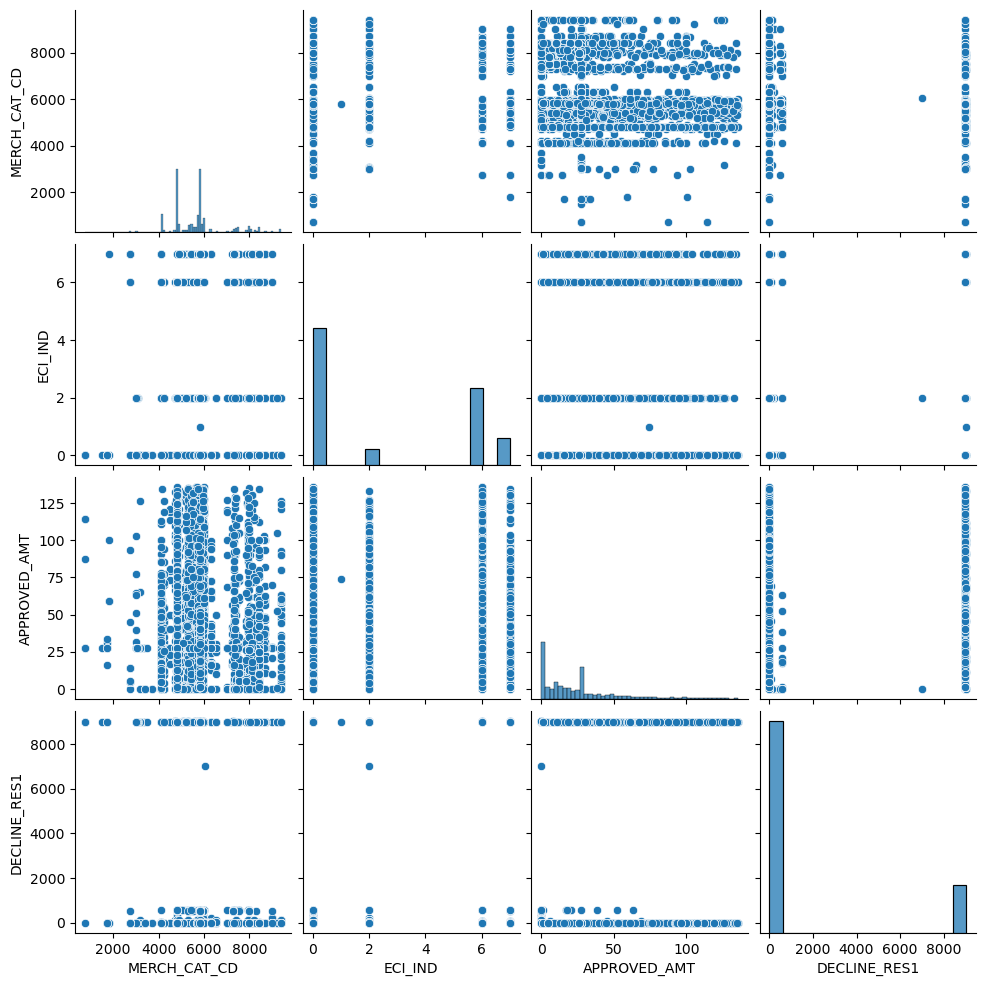

In [60]:
import seaborn as sns

sns.pairplot(data)

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>2. Feature Engineering</h1>
</div>


<div style="text-align: justify;">
Feature Engineering is a crucial process in data science and machine learning that involves transforming raw data into a format that better represents the underlying patterns to the learning algorithms. By creating new features or modifying existing ones, feature engineering enhances the predictive power of models, leading to improved performance and accuracy. This process not only helps in capturing complex relationships and interactions within the data but also in addressing issues such as noise and irrelevant information. Effective feature engineering allows for more insightful and robust models by enabling them to learn from more relevant and informative data attributes, thus optimizing the overall analytical and predictive outcomes.

</div>


**2.1 Feature: DECLINE_RES1**

In [61]:
# Convert DECLINE_RES1 from float to int64
data['DECLINE_RES1'] = data['DECLINE_RES1'].astype('int64')

In [62]:
# Strip any whitespace
data['ADFLAG'] = data['ADFLAG'].str.strip()

In [63]:
print(data.loc[(data['ADFLAG'].str.lower() == 'decline') & (data['DECLINE_RES1'] == 0)])

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
138   2023-11-28          5965          N  J1H4K        0           0.0   
158   2023-11-27          6300          N  89434        0           0.0   
164   2023-11-13          4816          N  J9J3M        0           0.0   
172   2023-11-29          5734          N  J9J3M        0           0.0   
185   2023-12-15          5732          N  J9J3M        0           0.0   
...          ...           ...        ...    ...      ...           ...   
9817  2023-11-26          5942          N  K1H6P        0           0.0   
9868  2023-12-15          5094          N  K1H6P        6           0.0   
9873  2023-12-16          7399          N  K1H6P        0           0.0   
9902  2023-12-31          8299          N  K1H6P        0           0.0   
9919  2024-01-05          4816          N  K1H6P        0           0.0   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD   ADFLAG  
138              0  06519E           MW  decline

In [64]:
# Get the unique non-zero values in DECLINE_RES1 where ADFLAG is 'decline'
non_zero_values = data.loc[(data['ADFLAG'].str.lower() == 'decline') & (data['DECLINE_RES1'] != 0), 'DECLINE_RES1'].unique()
print(f"Non-zero values in DECLINE_RES1: {non_zero_values}")

Non-zero values in DECLINE_RES1: [  48  124  207 9023  560  505  500 9017   14   85   86 9044 9026  530
   84 9022    7 9019 9024  321   42   43   44 9007 7015]


In [65]:
import numpy as np

most_frequent_value = np.bincount(non_zero_values).argmax()

data.loc[(data['ADFLAG'].str.lower() == 'decline') & (data['DECLINE_RES1'] == 0), 'DECLINE_RES1'] = most_frequent_value

print(data.loc[(data['ADFLAG'].str.lower() == 'decline') & (data['DECLINE_RES1'] == 0)]) #now, it should be zero


Empty DataFrame
Columns: [AUTH_CDT, MERCH_CAT_CD, TRAN_FRAUD, ZIP_CD, ECI_IND, APPROVED_AMT, DECLINE_RES1, AUTH_CD, TSYS_PROD_CD, ADFLAG]
Index: []


#### Rationale for Data Correction
In the context of this dataset, the `DECLINE_RES1` field is intended to capture specific codes associated with declined transactions. In contrast, approved transactions should logically have no `DECLINE_RES1` since the transaction was successful, they were replaced with`0`.

Upon examining the dataset, it was discovered that some transactions marked as declined (`ADFLAG = 'decline'`) had a `DECLINE_RES1` value of `0`. This is inconsistent with the intended data structure, where a declined transaction should always be associated with a valid decline code. This inconsistency likely arose due to a preprocessing step where null or missing values were indiscriminately replaced with `0`. While this approach may have been appropriate for approved transactions, it erroneously affected some declined transactions as well, resulting in the mislabeling of their decline codes as `0`.

To ensure the integrity and accuracy of the dataset, it was necessary to correct the `DECLINE_RES1` values for the affected declined transactions. Specifically, the `0` values in `DECLINE_RES1` for declined transactions were replaced with a valid decline code. This step was crucial because:

- **Consistency**: Ensuring that all declined transactions have a valid `DECLINE_RES1` code maintains the consistency and reliability of the dataset.
- **Data Integrity**: By correcting these values, we uphold the integrity of the dataset, which is essential for any subsequent analysis or modeling. An accurate and consistent dataset ensures that the results derived from it are valid and trustworthy.
- **Analytical Accuracy**: Inaccuracies in the `DECLINE_RES1` field could lead to erroneous conclusions or insights during data analysis. For example, models trained on a dataset with misclassified decline codes might learn incorrect patterns, leading to poor performance or biased results.

These `DECLINE_RES1` codes are connected to an internal mapping system that helps various teams troubleshoot the reasons for transaction failures. Although access to this internal map may be restricted, the codes themselves provide another layer of information about the nature of the failure beyond the ECI codes and are very specific to the company. For example, these codes can indicate issues such as:
- **System Failures:** Errors occurring within the transaction processing system.
- **Timeouts:** Delays that cause the transaction to fail.
- **Card Issuer Issues:** Problems related to the card issuer, such as insufficient funds or incorrect card details.

#### Method of Correction

To correct the dataset, the following steps were taken:


1. **Identification of Valid Decline Codes**: We first identified the unique, non-zero values in the `DECLINE_RES1` field for declined transactions. These values represent valid decline codes.
2. **Replacement of `0` Values**: The `0` values in the `DECLINE_RES1` field for declined transactions were then replaced with a valid decline code, ensuring that every declined transaction has an appropriate code.

This preprocessing step is essential to maintain the dataset's integrity, ensuring that approved transactions are correctly labeled with `0` in `DECLINE_RES1`, and that declined transactions have the appropriate decline codes. This approach ensures that the dataset accurately reflects the real-world scenarios it is meant to represent, thereby supporting robust and reliable data analysis.


**2.2 Feature: APPROVED_AMT**

In [66]:
# Print APPROVED_AMT is 0 and ADFLAG is 'decline'
declined_zero_approved_amt = data[(data['APPROVED_AMT'] == 0) & (data['ADFLAG'].str.lower() == 'decline')]
print(declined_zero_approved_amt)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
138   2023-11-28          5965          N  J1H4K        0           0.0   
158   2023-11-27          6300          N  89434        0           0.0   
164   2023-11-13          4816          N  J9J3M        0           0.0   
172   2023-11-29          5734          N  J9J3M        0           0.0   
185   2023-12-15          5732          N  J9J3M        0           0.0   
...          ...           ...        ...    ...      ...           ...   
9817  2023-11-26          5942          N  K1H6P        0           0.0   
9868  2023-12-15          5094          N  K1H6P        6           0.0   
9873  2023-12-16          7399          N  K1H6P        0           0.0   
9902  2023-12-31          8299          N  K1H6P        0           0.0   
9919  2024-01-05          4816          N  K1H6P        0           0.0   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD   ADFLAG  
138              7  06519E           MW  decline

In [67]:
import pandas as pd
import numpy as np

# Random float values below a specified threshold
def generate_random_value(threshold):
    return round(np.random.uniform(0, threshold), 2)

# Median of APPROVED_AMT where ADFLAG is 'approved'
approved_amt = data[data['ADFLAG'].str.lower() == 'approved']['APPROVED_AMT']
median_amt = approved_amt.median()

mask = (data['APPROVED_AMT'] == 0) & (data['ADFLAG'].str.lower() == 'decline')
decline_data = data[mask]

random_values_median = decline_data.apply(lambda _: generate_random_value(median_amt), axis=1)

# Replace 0 values with generated random values
data.loc[mask, 'APPROVED_AMT'] = random_values_median 

print(data)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
135   2023-11-08          5815          N  J1H4K        7         12.64   
136   2023-11-14          5968          N  J1H4K        0         81.63   
137   2023-11-23          5734          N  J1H4K        0         46.81   
138   2023-11-28          5965          N  J1H4K        0          0.83   
139   2023-11-28          5965          N  J1H4K        0          2.23   
...          ...           ...        ...    ...      ...           ...   
9995  2023-12-08          4121          N  V3A4E        6         14.07   
9996  2023-12-08          4121          N  V3A4E        0          5.00   
9997  2023-12-09          4121          N  V3A4E        6         12.68   
9998  2023-12-11          6300          N  V3A4E        0         15.95   
9999  2023-12-13          7997          N  V3A4E        0         26.24   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD    ADFLAG  
135              0  04377E           MW  approv

In [68]:
declined_zero_approved_amt1 = data[(data['APPROVED_AMT'] == 0) & (data['ADFLAG'].str.lower() == 'decline')]
print(declined_zero_approved_amt1)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
1288  2023-11-27          4816          N  L6V3J        0           0.0   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD   ADFLAG  
1288             7  08370E           MW  decline  


In the dataset, `APPROVED_AMT` should normally reflect a value for all transactions. For declined transactions (`ADFLAG = 'decline'`), the `APPROVED_AMT` was incorrectly set to 0 due to, possibly an internal error during data collection. This improper replacement affects data quality and integrity.

**Objective**

To correct this, we need to replace the `0` values with realistic, random float values based on the distribution of `APPROVED_AMT` for approved transactions. This ensures that the dataset remains consistent and complete for analysis.
</p>

**Rationale**

- **Consistency**: Replacing `0` with valid numeric values ensures that all entries have meaningful data.
- **Data Integrity**: Randomizing values within a reasonable range prevents the dataset from containing invalid `0`s, thus reflecting accurate transaction scenarios.
- **Avoiding Outliers**: The replacement values are kept below the median of approved transactions to avoid introducing extreme outliers.

**Method**

1. **Calculate Reference Values**: Use the median of `APPROVED_AMT` from approved transactions.
2. **Generate Random Values**: Replace `0` values with random floats the median.
3. **Update Dataset**: Implement these random values in place of `0`s to correct the dataset.

This approach ensures that the dataset is accurate and suitable for analysis by replacing incorrect `0`s with realistic values.


**2.3 Feature: MERCH_CAT_CD**

In [69]:
unique_values_merch_cat_cd = data['MERCH_CAT_CD'].unique()

print("Unique values in MERCH_CAT_CD column:")
for value in unique_values_merch_cat_cd:
    print(value)

num_unique_values_merch_cat_cd = len(unique_values_merch_cat_cd)
print(f"\nNumber of unique values in MERCH_CAT_CD column: {num_unique_values_merch_cat_cd}")

Unique values in MERCH_CAT_CD column:
5815
5968
5734
5965
4899
7523
6300
9399
3000
7997
4816
4814
5816
5732
8398
5818
5814
4111
5999
5499
5977
5661
4812
7399
7393
7349
7221
5200
4900
7922
7372
5942
7032
5300
3366
5912
5812
5817
8999
5621
5641
3009
4722
4789
7512
5719
5941
7999
8699
4121
7991
4511
3180
7011
5945
5691
5735
5611
4112
5948
5944
5971
4215
5311
5399
6540
8299
5045
5411
7829
7841
5921
5969
7392
5699
7929
8099
7911
5192
5970
5995
8220
4784
7273
5331
5533
4829
6513
5964
7278
7531
5943
3039
5251
7299
5946
1711
8675
7542
7311
3007
7832
8043
7994
7298
5651
5931
5631
8211
7941
5511
8641
5712
5065
5811
5733
5940
5967
7993
7230
5462
5947
4225
7379
5441
3501
5552
5960
8661
5949
5541
9406
5044
5094
7333
7996
5992
7395
742
5532
2741
8011
3001
1799
5993
7992
5655
5072
4131
5722
3703
1520
7339
3034
8734
5422
7538
7321
5099
7394
7261
4214
5046
3405
5310
9311
4468
5039
8071
3058
3084
5047
5713
7276
6051
9222
3049
5199
5193
8111
5261
5169

Number of unique values in MERCH_CAT_CD column: 182


In [70]:
# Dictionary mapping MCC codes to descriptions
mcc_mapping = {
    5815: "Digital Goods Media",
    5968: "Direct Marketing - Other Direct Marketers",
    5734: "Computer Software Stores",
    5965: "Telephone Sales",
    4899: "Cable, Satellite, and Other Pay Television and Radio Services",
    7523: "Parking Lots and Garages",
    6300: "Insurance Sales, Underwriting, and Premiums",
    9399: "Government Services - Not Elsewhere Classified",
    3000: "Airlines",
    7997: "Membership Clubs (Sports, Recreation)",
    4816: "Prepaid Telephone Cards",
    4814: "Telecommunication Services",
    5816: "Fast Food Restaurants",
    5732: "Electronics Stores",
    8398: "Charitable and Social Service Organizations",
    5818: "Cafeterias, Coffee Shops, Donuts",
    5814: "Fast Food Restaurants",
    4111: "Transportation Services",
    5999: "Miscellaneous Retail Stores",
    5499: "Miscellaneous Food Stores",
    5977: "Cosmetics, Beauty Supplies",
    5661: "Shoe Stores",
    4812: "Telegraph Services",
    7399: "Business Services",
    7393: "Auction Houses",
    7349: "Cleaning and Maintenance",
    7221: "Photographic Studios",
    5200: "Home Improvement Stores",
    4900: "Utilities",
    7922: "Theatrical Producers and Ticket Agencies",
    7372: "Computer Programming",
    5942: "Book Stores",
    7032: "Amusement Parks",
    5300: "Discount Stores",
    3366: "Boat Dealers",
    5912: "Pharmacies",
    5812: "Restaurants",
    5817: "Delicatessens",
    8999: "Services - Not Elsewhere Classified",
    5621: "Women's Clothing Stores",
    5641: "Men’s Clothing Stores",
    3009: "Airlines",
    4722: "Travel Agencies and Tour Operators",
    4789: "Transportation Services",
    7512: "Car Rental Agencies",
    5719: "Furniture and Home Furnishings Stores",
    5941: "Sporting Goods Stores",
    7999: "Recreational Services",
    8699: "Membership Organizations",
    4121: "Taxi Services",
    7991: "Tourist Attractions",
    4511: "Airlines, Air Carriers",
    3180: "Airlines, Air Carriers",
    7011: "Lodging - Hotels, Motels",
    5945: "Hobby, Toy, and Game Stores",
    5691: "Men’s and Boys’ Clothing Stores",
    5735: "Record Stores",
    5611: "Men’s Clothing Stores",
    4112: "Passenger Railways",
    5948: "Luggage and Leather Goods Stores",
    5944: "Jewelry Stores",
    5971: "Jewelry and Watch Stores",
    4215: "Courier Services",
    5311: "Department Stores",
    5399: "Miscellaneous General Merchandise",
    6540: "Stored Value Cards",
    8299: "Schools and Educational Services",
    5045: "Computers and Computer Peripheral Equipment",
    5411: "Grocery Stores and Supermarkets",
    7829: "Film Processing",
    7841: "Video Tape Rental",
    5921: "Pawn Shops",
    5969: "Other Direct Marketing",
    7392: "Petroleum and Petroleum Products",
    5699: "Miscellaneous Apparel and Accessory Shops",
    7929: "Bingo and Lottery Services",
    8099: "Health Practitioners",
    7911: "Dance Halls and Studios",
    5192: "Books, Periodicals, and Newspapers",
    5970: "Cameos, Medals, and Coins",
    5995: "Pet Shops",
    8220: "Colleges and Universities",
    4784: "Toll and Bridge Fees",
    7273: "Dating Services",
    5331: "Variety Stores",
    5533: "Automotive Parts and Accessories",
    4829: "Money Transfer Services",
    6513: "Real Estate Agents and Managers",
    5964: "Direct Marketing - Catalog Merchants",
    7278: "Wedding Services",
    7531: "Automotive Repair Shops",
    5943: "Stationery Stores",
    3039: "Airlines",
    5251: "Hardware Stores",
    7299: "Miscellaneous Personal Services",
    5946: "Camera and Photographic Supply Stores",
    1711: "Heating, Ventilation, and Air Conditioning Services",
    8675: "Automotive Consultants",
    7542: "Car Washes",
    7311: "Advertising Services",
    3007: "Airlines",
    7832: "Movie Theaters",
    8043: "Optometrists and Ophthalmologists",
    7994: "Video Arcade Games",
    7298: "Health and Beauty Aids",
    5651: "Family Clothing Stores",
    5931: "Second-Hand Stores",
    5631: "Women's Accessory Stores",
    8211: "Elementary and Secondary Schools",
    7941: "Sports and Recreation Clubs",
    5511: "Automobile Dealers",
    8641: "Legal Services",
    5712: "Furniture Stores",
    5065: "Electronic Parts and Equipment",
    5811: "Caterers",
    5733: "Music Stores",
    5940: "Jewelry Stores",
    5967: "Direct Marketing - Outbound Telemarketing",
    7993: "Camping Equipment",
    7230: "Barbers and Beauty Shops",
    5462: "Bakeries",
    5947: "Gift, Card, Novelty, and Souvenir Stores",
    4225: "Public Warehousing and Storage",
    7379: "Computer Services",
    5441: "Candy, Nut, and Confectionery Stores",
    3501: "Shipbuilding and Repairing",
    5552: "Automobile Parking Lots",
    5960: "Direct Marketing - Television",
    8661: "Religious Organizations",
    5949: "Shoe Stores",
    5541: "Service Stations",
    9406: "Postal Services",
    5044: "Office Equipment",
    5094: "Jewelry and Watch Stores",
    7333: "Copy Shops",
    7996: "Billiard and Pool Halls",
    5992: "Automotive Parts Stores",
    7395: "Photofinishing Services",
    742: "Pet Grooming and Boarding",
    5532: "Automotive Tire Stores",
    2741: "Miscellaneous Publishing",
    8011: "Doctors",
    3001: "Airlines",
    1799: "Special Trade Services",
    5993: "Cigar Stores",
    7992: "Golf Courses",
    5655: "Men's and Boys' Clothing Stores",
    5072: "Hardware Stores",
    4131: "Bus Lines",
    5722: "Household Appliance Stores",
    3703: "Airlines",
    1520: "General Contractors",
    7339: "Sign Painting",
    3034: "Airlines",
    8734: "Testing Laboratories",
    5422: "Meat and Fish Markets",
    7538: "Automotive Painting",
    7321: "Advertising Services",
    5099: "Miscellaneous Durable Goods",
    7394: "Equipment Rental and Leasing",
    7261: "Dating Services",
    4214: "Limos and Chauffeur Services",
    5046: "Dental Equipment and Supplies",
    3405: "Aerospace Products and Parts",
    5310: "Discount Stores",
    9311: "Insurance Adjusters",
    4468: "Freight Shipping",
    5039: "Construction Materials",
    8071: "Medical and Dental Laboratories",
    3058: "Airlines",
    3084: "Airlines",
    5047: "Medical Equipment",
    5713: "Floor Covering Stores",
    7276: "Debt Collection Agencies",
    6051: "Securities Brokers and Dealers",
    9222: "Fines",
    3049: "Airlines",
    5199: "Miscellaneous General Merchandise",
    5193: "Material Handling Equipment",
    8111: "Legal Services",
    5261: "Lawn and Garden Supply Stores",
    5169: "Chemicals"
}

In [71]:
# Map the MCC codes to their descriptions
data['MCC_Description'] = data['MERCH_CAT_CD'].map(mcc_mapping)

print(data[['MERCH_CAT_CD', 'MCC_Description']].head(20))

     MERCH_CAT_CD                                    MCC_Description
135          5815                                Digital Goods Media
136          5968          Direct Marketing - Other Direct Marketers
137          5734                           Computer Software Stores
138          5965                                    Telephone Sales
139          5965                                    Telephone Sales
140          5815                                Digital Goods Media
141          5815                                Digital Goods Media
142          4899  Cable, Satellite, and Other Pay Television and...
143          5968          Direct Marketing - Other Direct Marketers
144          7523                           Parking Lots and Garages
145          7523                           Parking Lots and Garages
146          7523                           Parking Lots and Garages
147          5734                           Computer Software Stores
148          7523                 

**2.4 Feature: ECI_IND**

In [72]:
unique_values_eci = data['ECI_IND'].unique()

print("Unique values in ECI_IND column:")
for value in unique_values_eci:
    print(value)

num_unique_values_eci = len(unique_values_eci)
print(f"\nNumber of unique values in ECI_IND column: {num_unique_values_eci}")

Unique values in ECI_IND column:
7
0
6
2
1

Number of unique values in ECI_IND column: 5


In [73]:
# Mapping the ECI_IND values
eci_mapping = {
    7: 'Authentication Failed/Unavailable',
    0: 'Authentication Failed/Unavailable',
    6: 'Authentication Attempted',
    2: 'Authentication Successful',
    1: 'Authentication Attempted'
}

data['ECI_Description'] = data['ECI_IND'].map(eci_mapping)

print(data)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
135   2023-11-08          5815          N  J1H4K        7         12.64   
136   2023-11-14          5968          N  J1H4K        0         81.63   
137   2023-11-23          5734          N  J1H4K        0         46.81   
138   2023-11-28          5965          N  J1H4K        0          0.83   
139   2023-11-28          5965          N  J1H4K        0          2.23   
...          ...           ...        ...    ...      ...           ...   
9995  2023-12-08          4121          N  V3A4E        6         14.07   
9996  2023-12-08          4121          N  V3A4E        0          5.00   
9997  2023-12-09          4121          N  V3A4E        6         12.68   
9998  2023-12-11          6300          N  V3A4E        0         15.95   
9999  2023-12-13          7997          N  V3A4E        0         26.24   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD    ADFLAG  \
135              0  04377E           MW  appro

<div style="text-align: justify;">

### Challenge in Identifying Transaction Outcomes

The main challenge in interpreting transaction outcomes with the available data arises from the absence of card details, removed for security reasons, which limits the ability to accurately determine the precise status of each transaction. Specifically:<br><br>

1. **Overlap of Status Codes**:<br>
   - **Failed/Rejected** and **Unavailable** statuses can overlap in meaning. For example, a transaction marked as `Authentication Failed/Rejected` might also be categorized as `Authentication Unavailable`. In countries where Strong Customer Authentication is not mandatory but rather a recommendation, this may be a likely outcome.<br><br>

2. **Approval of Transactions**:<br>
   - In cases where the merchant's configuration allows transactions where cards are not registered for Strong Customer Authentication, it's possible for some transactions to be approved. For instance, if a merchant’s account is set up to accept transactions without authentication, transactions might still be approved by the card schemes.<br><br>

3. **Card Issuer Configurations**:<br>
   - Different card issuers may have varying rules and configurations for handling authentication. For example, some card issuers might approve transactions even when certain authentication issues are flagged, depending on their internal policies and risk management strategies. Without knowing which card issuer is involved, understanding the exact reason for approval or rejection becomes challenging.<br><br>

</div>


**2.5 Feature: TRAN_FRAUD**

In [74]:
unique_values_trn = data['TRAN_FRAUD'].unique()

print("Unique values in TRAN_FRAUD column:")
for value in unique_values_trn:
    print(value)

num_unique_values_trn = len(unique_values_trn)
print(f"\nNumber of unique values in TRAN_FRAUD column: {num_unique_values_trn}")

Unique values in TRAN_FRAUD column:
N
U
Y

Number of unique values in TRAN_FRAUD column: 3


In [75]:
# One-hot encoding

one_hot_encoded = pd.get_dummies(data['TRAN_FRAUD'], prefix='TRAN_FRAUD').astype(int)

data = pd.concat([data, one_hot_encoded], axis=1)

print(data)

        AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
135   2023-11-08          5815          N  J1H4K        7         12.64   
136   2023-11-14          5968          N  J1H4K        0         81.63   
137   2023-11-23          5734          N  J1H4K        0         46.81   
138   2023-11-28          5965          N  J1H4K        0          0.83   
139   2023-11-28          5965          N  J1H4K        0          2.23   
...          ...           ...        ...    ...      ...           ...   
9995  2023-12-08          4121          N  V3A4E        6         14.07   
9996  2023-12-08          4121          N  V3A4E        0          5.00   
9997  2023-12-09          4121          N  V3A4E        6         12.68   
9998  2023-12-11          6300          N  V3A4E        0         15.95   
9999  2023-12-13          7997          N  V3A4E        0         26.24   

      DECLINE_RES1 AUTH_CD TSYS_PROD_CD    ADFLAG  \
135              0  04377E           MW  appro

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9744 entries, 135 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AUTH_CDT         9744 non-null   object 
 1   MERCH_CAT_CD     9744 non-null   int64  
 2   TRAN_FRAUD       9744 non-null   object 
 3   ZIP_CD           9744 non-null   object 
 4   ECI_IND          9744 non-null   int64  
 5   APPROVED_AMT     9744 non-null   float64
 6   DECLINE_RES1     9744 non-null   int64  
 7   AUTH_CD          9744 non-null   object 
 8   TSYS_PROD_CD     9744 non-null   object 
 9   ADFLAG           9744 non-null   object 
 10  MCC_Description  9744 non-null   object 
 11  ECI_Description  9744 non-null   object 
 12  TRAN_FRAUD_N     9744 non-null   int64  
 13  TRAN_FRAUD_U     9744 non-null   int64  
 14  TRAN_FRAUD_Y     9744 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 1.2+ MB


In [77]:
data.drop('TRAN_FRAUD_U', axis=1, inplace=True)

In [78]:
#a binary metric was added to make the ADFLAG the dependable variable. 

data['ADFLAG_BINARY'] = data['ADFLAG'].apply(lambda x: 1 if x == 'approved' else 0)

**2.5 Feature: TSYS_PROD_CD**

In [79]:
data = data.drop(columns=['TSYS_PROD_CD'])

data.head()

AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
135  2023-11-08          5815          N  J1H4K        7         12.64   
136  2023-11-14          5968          N  J1H4K        0         81.63   
137  2023-11-23          5734          N  J1H4K        0         46.81   
138  2023-11-28          5965          N  J1H4K        0          0.83   
139  2023-11-28          5965          N  J1H4K        0          2.23   

     DECLINE_RES1 AUTH_CD    ADFLAG  \
135             0  04377E  approved   
136             0  02682E  approved   
137             0  03584E  approved   
138             7  06519E   decline   
139             0  06820E  approved   

                               MCC_Description  \
135                        Digital Goods Media   
136  Direct Marketing - Other Direct Marketers   
137                   Computer Software Stores   
138                            Telephone Sales   
139                            Telephone Sales   

                       ECI_Description  TRAN_FRAUD_N  TRAN_FRAUD_Y  \
135  Authentication Failed/Unavailable             1             0   
136  Authentication Failed/Unavailable             1             0   
137  Authentication Failed/Unavailable             1             0   
138  Authentication Failed/Unavailable             1             0   
139  Authentication Failed/Unavailable             1             0   

     ADFLAG_BINARY  
135              1  
136              1  
137              1  
138              0  
139              1

**2.6 Correlation Matrix**

Correlation Matrix Values:
               MERCH_CAT_CD   ECI_IND  APPROVED_AMT  DECLINE_RES1  \
MERCH_CAT_CD       1.000000 -0.239049      0.002420      0.082108   
ECI_IND           -0.239049  1.000000      0.031865     -0.074465   
APPROVED_AMT       0.002420  0.031865      1.000000      0.153980   
DECLINE_RES1       0.082108 -0.074465      0.153980      1.000000   
TRAN_FRAUD_N      -0.010064  0.031144      0.018516     -0.012965   
TRAN_FRAUD_Y       0.004071 -0.029277     -0.014857      0.001749   
ADFLAG_BINARY     -0.030035  0.305187      0.258354      0.187870   

               TRAN_FRAUD_N  TRAN_FRAUD_Y  ADFLAG_BINARY  
MERCH_CAT_CD      -0.010064      0.004071      -0.030035  
ECI_IND            0.031144     -0.029277       0.305187  
APPROVED_AMT       0.018516     -0.014857       0.258354  
DECLINE_RES1      -0.012965      0.001749       0.187870  
TRAN_FRAUD_N       1.000000     -0.898486       0.073768  
TRAN_FRAUD_Y      -0.898486      1.000000      -0.057087  
ADFLAG_

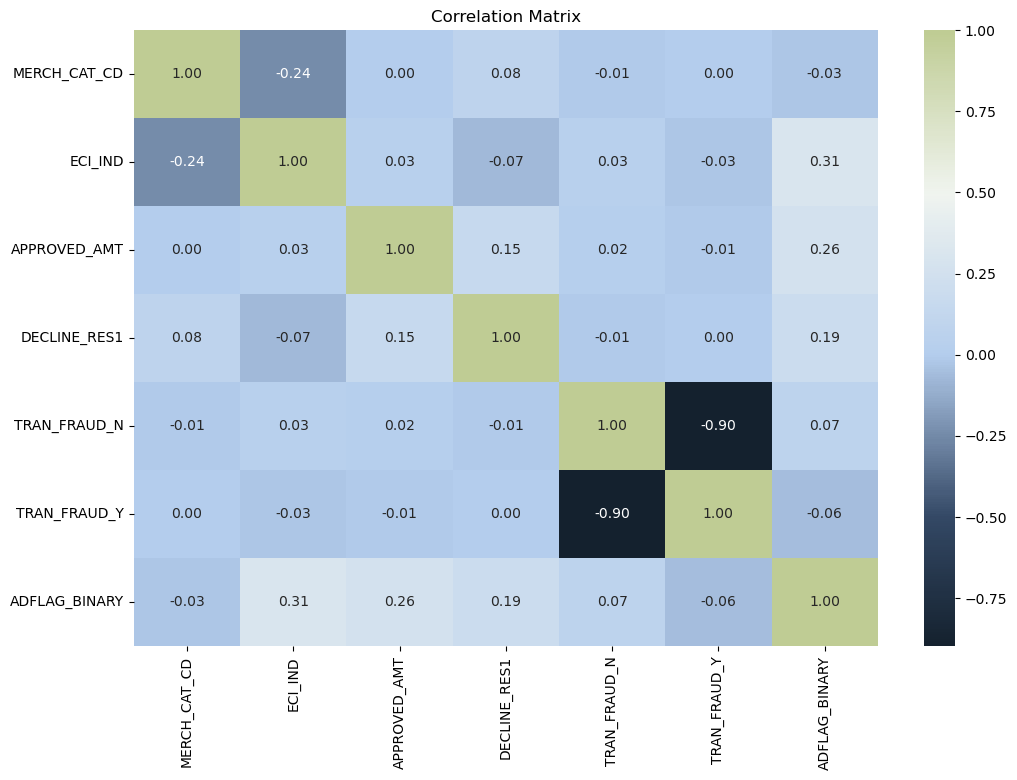

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = data.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

print("Correlation Matrix Values:")
print(correlation_matrix)

cmap = sns.color_palette("blend:#0D1821,#344966,#B4CDED,#F0F4EF,#BFCC94", as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', center=0)
plt.title('Correlation Matrix')
plt.show()


#### Key Relationships

- **ECI_IND and ADFLAG_BINARY (0.305)**
  - There is a moderate positive correlation between `ECI_IND` and `ADFLAG_BINARY`. 

- **APPROVED_AMT and ADFLAG_BINARY (0.254)**
  - A weak to moderate positive correlation exists between `APPROVED_AMT` and `ADFLAG_BINARY`. This indicates that higher approved amounts are somewhat associated with an increase in `ADFLAG_BINARY` being 1.

- **DECLINE_RES1 and ADFLAG_BINARY (0.188)**
  - There is a weak positive correlation between `DECLINE_RES1` and `ADFLAG_BINARY`.


In [81]:
# Copy to save the cleaned and prepared version
data_cleaned = data.copy()

# CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>3. Machine Learning</h1>
</div>


<div style="text-align: justify;">
 In the literature reviewed, several machine learning algorithms have been identified as particularly effective for handling transactional data. Among these, the Random Forest Algorithm, Logistic Regression, Support Vector Machine (SVM), and Autoencoder Neural Networks stand out due to their unique strengths in processing and analyzing complex transaction datasets.
</div>


<div style="text-align: justify;">
    
- **Logistic Regression** remains a cornerstone in binary classification tasks, such as determining transaction success or failure. Its simplicity and interpretability make it an attractive choice for modeling transactional data, especially when the relationship between predictors and outcomes is approximately linear.
</div>

<div style="text-align: justify;">
    
- **Random Forest Algorithm** is valued for its ensemble learning approach, which combines multiple decision trees to improve accuracy and control overfitting. Its robustness in handling large datasets with numerous features makes it well-suited for transactional data, where interactions between various attributes can be intricate.
</div>

<div style="text-align: justify;">
    
- **Support Vector Machine (SVM)** excels in finding optimal decision boundaries between classes by maximizing the margin between them. This is particularly useful in transactional data where distinguishing between different classes or outcomes is crucial. Its effectiveness in high-dimensional spaces and ability to handle non-linear relationships with the appropriate kernel functions further enhance its suitability.
</div>

<div style="text-align: justify;">
    
- **Autoencoder Neural Networks** are adept at dimensionality reduction and feature learning through unsupervised learning techniques. In the context of transactional data, autoencoders can identify and extract significant patterns and anomalies from high-dimensional data, facilitating more nuanced insights and improving the performance of downstream predictive models.
</div>

### 3.1 Logistic Regression

<p style="text-align: justify;">
Logistic Regression is a statistical method commonly used for classification problems where the outcome is binary. It is widely utilized in machine learning and data science for predicting the probability of a categorical dependent variable based on one or more independent variables. 
</p>

**Binary Logistic Regression**

<p style="text-align: justify;">
Binary Logistic Regression is a statistical method used for predicting binary outcomes, such as "yes/no" or "1/0". It is employed when the dependent variable is dichotomous, meaning it has only two possible outcomes. For instance, it could predict whether a patient has a disease or not, or whether a customer will churn or not.
</p>

**Key Concepts**

<p style="text-align: justify;">
- <strong>Dependent Variable</strong>: Binary (e.g., 0 or 1).<br>
- <strong>Independent Variables</strong>: Can be nominal, ordinal, interval, or ratio-level.
</p>

**Why Use Binary Logistic Regression Instead of Linear Regression?**

<p style="text-align: justify;">
- <strong>Probability Constraints</strong>: Logistic regression is used because linear regression might predict probabilities outside the range of 0 to 1, which is not appropriate for binary outcomes.<br>
- <strong>Outlier Sensitivity</strong>: Linear regression can be affected by outliers, while logistic regression uses the sigmoid function to map predictions into the [0, 1] range, making it less sensitive to outliers.
</p>

**Logistic Function**

<p style="text-align: justify;">
The logistic function, or sigmoid function, transforms a linear combination of input variables into a probability between 0 and 1. The formula is:
</p>

$$
P = \frac{1}{1 + e^{-z}}
$$

<p style="text-align: justify;">
where $z = \theta^T \cdot x$ (i.e., the linear combination of input features $x$ and coefficients $\theta$).
</p>

<p style="text-align: justify;">
Here is a plot illustrating the sigmoid function, which demonstrates how the logistic function maps values from $-\infty$ to $+\infty$ to a range between 0 and 1:
</p>

<img src="Images/logreg.png" alt="Sigmoid Function" style="width: 40%; height: auto;"/>

**Model Training and Prediction**

<p style="text-align: justify;">
1. <strong>Prepare the Data</strong>: Ensure the data is in the correct format, with a binary target variable (e.g., ADFLAG_BINARY).<br>
2. <strong>Train the Model</strong>: Use training data to fit the logistic regression model.<br>
3. <strong>Evaluate the Model</strong>: Assess model performance using metrics such as ROC curve, confusion matrix, accuracy, precision, recall, F1 score and support on test data.<br>

**Evaluation Metrics for Logistic Regression**
<p style="text-align: justify;">
    
1.  <strong>AUC ROC Curve:</strong> The AUC ROC curve measures the model’s ability to distinguish between classes by plotting the True Positive Rate against the False Positive Rate. A higher AUC score (closer to 1) indicates better performance.<br>
2. <strong>Confusion Matrix:</strong>  This matrix shows the counts of True Positives, False Positives, True Negatives, and False Negatives, providing a detailed breakdown of classification results.<br>
3. <strong>Precision:</strong> Precision evaluates the proportion of true positive predictions out of all positive predictions made by the model, indicating the model's ability to avoid false positives.<br>
4. <strong>Recall:</strong> Recall (or sensitivity) calculates the proportion of true positive predictions from all actual positives in the dataset, emphasizing the model's ability to identify all relevant instances.<br>
5. <strong>F1-score:</strong> The F1-score combines precision and recall into a single metric, balancing both metrics to provide a harmonic mean, ideal for imbalanced datasets. It assesses a model's accuracy by considering false positives and negatives in classification tasks.<br>


In [82]:
data.head()

AUTH_CDT  MERCH_CAT_CD TRAN_FRAUD ZIP_CD  ECI_IND  APPROVED_AMT  \
135  2023-11-08          5815          N  J1H4K        7         12.64   
136  2023-11-14          5968          N  J1H4K        0         81.63   
137  2023-11-23          5734          N  J1H4K        0         46.81   
138  2023-11-28          5965          N  J1H4K        0          0.83   
139  2023-11-28          5965          N  J1H4K        0          2.23   

     DECLINE_RES1 AUTH_CD    ADFLAG  \
135             0  04377E  approved   
136             0  02682E  approved   
137             0  03584E  approved   
138             7  06519E   decline   
139             0  06820E  approved   

                               MCC_Description  \
135                        Digital Goods Media   
136  Direct Marketing - Other Direct Marketers   
137                   Computer Software Stores   
138                            Telephone Sales   
139                            Telephone Sales   

                       ECI_Description  TRAN_FRAUD_N  TRAN_FRAUD_Y  \
135  Authentication Failed/Unavailable             1             0   
136  Authentication Failed/Unavailable             1             0   
137  Authentication Failed/Unavailable             1             0   
138  Authentication Failed/Unavailable             1             0   
139  Authentication Failed/Unavailable             1             0   

     ADFLAG_BINARY  
135              1  
136              1  
137              1  
138              0  
139              1

**3.1.1 Logistic Regression Model 01**

<p style="text-align: justify;">
In this initial phase of our project, we will implement a vanilla version of logistic regression as our foundational model. By focusing on a straightforward approach, we will first develop a basic logistic regression model without incorporating any advanced techniques or optimizations. This will allow us to establish a clear baseline for performance and gain a fundamental understanding of how logistic regression operates on our data. Once this baseline is set, we can then explore and integrate more sophisticated methods to enhance the model's effectiveness.
</p>

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [86]:
logreg1 = LogisticRegression(random_state=42)  #default: lbfgs
logreg1.fit(X_train, y_train) 

LogisticRegression(random_state=42)

In [87]:
y_pred1 = logreg1.predict(X_test) 

In [88]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba1 = logreg1.predict_proba(X_test)[:, 1]

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
auc_score = roc_auc_score(y_test, y_pred_proba1)

colors = ['#0D1821', '#344966', '#B4CDED', '#FFFFFF', '#BFCC94']

# ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr, 
    mode='lines', 
    name=f'ROC Curve (AUC = {auc_score:.2f})', 
    line=dict(color=colors[1], width=2)
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1], 
    mode='lines', 
    name='Random Chance', 
    line=dict(color=colors[4], dash='dash', width=2)
))

fig.update_layout(
    title="Receiver Operating Characteristic Curve: logreg1",
    xaxis_title="False Positive Rate (FPR)",
    yaxis_title="True Positive Rate (TPR)",
    title_x=0.5,
    showlegend=True,
    width=700,
    height=500,
    plot_bgcolor=colors[3],
    paper_bgcolor=colors[3],
    font=dict(color=colors[0])
)

fig.show()


In [89]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

colorscale = [[0, '#344966'], [1, '#BFCC94']]

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1'],
    y=['Class 0', 'Class 1'],
    colorscale=colorscale,
    hoverongaps=False,
    showscale=False, 
    text=conf_matrix,  
    texttemplate="%{text}",
    textfont={"size": 20},
))

fig.update_layout(
    title={'text': 'Confusion Matrix Model 01: logreg1', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=600,
    height=500,
    font=dict(size=16),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='white'
)

fig.show()

- True Positives (TP): 2297 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 85 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 387 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 155 (Class 1 incorrectly predicted as Class 0)


In [90]:
# Cross-Validation

from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(logreg1, X_encoded, y, cv=5)
mean_cv_score1 = cv_scores1.mean()

print(f'Cross-Validation Scores: {cv_scores1}')
print(f'Mean Cross-Validation Score: {cv_scores1.mean():.2f}')

Cross-Validation Scores: [0.81375064 0.81015906 0.80605439 0.80194972 0.8023614 ]
Mean Cross-Validation Score: 0.81


In [91]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(cv_scores1) + 1)),
    y=cv_scores1,
    mode='lines+markers',
    line=dict(color='#BFCC94', dash='dash'),  
    marker=dict(symbol='circle', size=10),
    name='Cross-Validation Scores'
))

fig.add_trace(go.Scatter(
    x=[1, len(cv_scores1)],
    y=[mean_cv_score1, mean_cv_score1],
    mode='lines',
    line=dict(color='#344966', width=2),  
    name=f'Mean Score ({mean_cv_score1:.2f})'
))

fig.update_layout(
    title={'text': 'Cross-Validation Scores: logreg1', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Fold',
    yaxis_title='Score',
    width=700,
    height=400,
    font=dict(size=12),
    margin=dict(l=80, r=20, t=70, b=70),
    legend=dict(
         x=0.5,  
        y=-0.3,  
        xanchor='center',  
        yanchor='top',  
        orientation='h', 
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()


#### Cross-Validation Scores

The cross-validation scores across different folds are:

\[
[0.82401231 0.81785531 0.80451514 0.79220113 0.81160164]\]

- **Cross-Validation Scores:** The model's performance on different folds is quite consistent, ranging from approximately 0.792 to 0.824.
- **Mean Cross-Validation Score:** The average score across all folds is 0.81. 

In [92]:
class_report = classification_report(y_test, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[  85  387]
 [ 155 2297]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.18      0.24       472
           1       0.86      0.94      0.89      2452

    accuracy                           0.81      2924
   macro avg       0.60      0.56      0.57      2924
weighted avg       0.77      0.81      0.79      2924



#### Classification Report Logistic Regression Model 01

\
\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.35 & 0.18 & 0.24 & 472 \\
1 & 0.86 & 0.94 & 0.89 & 2452 \\
\end{array}


#### Class 0 (Negative Class):

- **Precision:** 0.35  
  Only 35% of the instances predicted as class 0 were correct. This indicates low precision for class 0.

- **Recall:** 0.18  
  The model identified only 18% of the actual class 0 instances. This indicates poor recall for class 0.

- **F1-Score:** 0.24  
  A combined measure of precision and recall for class 0, showing the model's overall poor performance for this class.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.84  
  84% of the instances predicted as class 1 were correct. This indicates high precision for class 1.

- **Recall:** 0.94  
  The model identified 94% of the actual class 1 instances. This indicates high recall for class 1.

- **F1-Score:** 0.89  
  A combined measure of precision and recall for class 1, showing strong overall performance for this class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
It has high precision and recall for class 1, leading to a high F1-Score of 0.89. However, the performance for class 0 (negative) is significantly weaker, with low precision, recall, and F1-Score. This suggests that while the model is very effective at identifying positive instances, it struggles with identifying negative instances. Addressing this imbalance could involve methods like resampling, adjusting class weights, or exploring different algorithms to improve the model's ability to correctly classify class 0 instances.
</p>

**3.1.2 Logistic Regression Model 02**

<p style="text-align: justify;">
In this phase of model development, we will enhance the performance of the model by incorporating feature scaling and regularization. Feature scaling is crucial for ensuring that all input features contribute equally to the model's learning process. To achieve this, we will use the StandardScaler to standardize our features, transforming them to have a mean of zero and a standard deviation of one.
This step helps in speeding up convergence and improving the accuracy of the model. Additionally, we will apply regularization to mitigate overfitting and improve the model's generalization to unseen data. By setting the regularization parameter 
𝐶 to 0.01, we introduce L2 regularization (added by default) which penalizes large coefficients, thereby promoting a more stable and generalizable model.
</p>

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [94]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [95]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [97]:
# Model Training with Regularization (L2 by default)
logreg2 = LogisticRegression(C=0.01, random_state=42) #the lower C, the better, C=0.1 gave me a 81%

logreg2.fit(X_train, y_train) 

LogisticRegression(C=0.01, random_state=42)

In [98]:
y_pred2 = logreg2.predict(X_test)  

In [99]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba2 = logreg2.predict_proba(X_test)[:, 1]

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
auc_score = roc_auc_score(y_test, y_pred_proba2)

colors = ['#0D1821', '#344966', '#B4CDED', '#FFFFFF', '#BFCC94']

# ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr, 
    mode='lines', 
    name=f'ROC Curve (AUC = {auc_score:.2f})', 
    line=dict(color=colors[1], width=2)
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1], 
    mode='lines', 
    name='Random Chance', 
    line=dict(color=colors[4], dash='dash', width=2)
))

fig.update_layout(
    title="Receiver Operating Characteristic Curve: logreg2",
    xaxis_title="False Positive Rate (FPR)",
    yaxis_title="True Positive Rate (TPR)",
    title_x=0.5,
    showlegend=True,
    width=700,
    height=500,
    plot_bgcolor=colors[3],
    paper_bgcolor=colors[3],
    font=dict(color=colors[0])
)

fig.show()

In [100]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

colorscale = [[0, '#344966'], [1, '#BFCC94']]

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1'],
    y=['Class 0', 'Class 1'],
    colorscale=colorscale,
    hoverongaps=False,
    showscale=False,  
    text=conf_matrix,  
    texttemplate="%{text}",
    textfont={"size": 20},
))

fig.update_layout(
    title={'text': 'Confusion Matrix Model 02: logreg2', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=600,
    height=500,
    font=dict(size=16),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='white'
)

fig.show()

- True Positives (TP): 2448 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 3 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 469 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 4 (Class 1 incorrectly predicted as Class 0) 

In [101]:
# Cross-Validation
cv_scores2 = cross_val_score(logreg2, X_scaled, y, cv=5)
mean_cv_score2 = cv_scores2.mean()

print(f'Cross-Validation Scores: {cv_scores2}')
print(f'Mean Cross-Validation Score: {cv_scores2.mean():.2f}')

Cross-Validation Scores: [0.83837866 0.83581324 0.83427399 0.83632632 0.8362423 ]
Mean Cross-Validation Score: 0.84


In [102]:
# Cross-Validation

import plotly.graph_objects as go
import numpy as np


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(cv_scores1) + 1)),
    y=cv_scores1,
    mode='lines+markers',
    line=dict(color='#BFCC94', dash='dash'),  
    marker=dict(symbol='circle', size=10),
    name='Cross-Validation Scores'
))

fig.add_trace(go.Scatter(
    x=[1, len(cv_scores1)],
    y=[mean_cv_score2, mean_cv_score2],
    mode='lines',
    line=dict(color='#344966', width=2),  
    name=f'Mean Score ({mean_cv_score2:.2f})'
))

fig.update_layout(
    autosize=True, 
    title={'text': 'Cross-Validation Scores: logreg2', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Fold',
    yaxis_title='Score',
    width=700,  #
    height=400,  
    font=dict(size=12),
    margin=dict(l=50, r=50, t=50, b=50),  
    legend=dict(
        x=0.5,  
        y=-0.3,  
        xanchor='center',  
        yanchor='top',  
        orientation='h'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()


#### Cross-Validation Scores

The cross-validation scores across different folds are:

\[
[0.83889174 0.83581324 0.83427399 0.83581324 0.83572895]\]

- **Cross-Validation Scores:** The model's performance on different folds is quite consistent, ranging from approximately 0.833 to 0.838.
- **Mean Cross-Validation Score:** The average score across all folds is 0.84.

In [103]:
class_report = classification_report(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[   3  469]
 [   4 2448]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.01      0.01       472
           1       0.84      1.00      0.91      2452

    accuracy                           0.84      2924
   macro avg       0.63      0.50      0.46      2924
weighted avg       0.77      0.84      0.77      2924



#### Classification Report Logistic Regression Model 02

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.43 & 0.01 & 0.01 & 472 \\
1 & 0.84 & 1.00 & 0.91 & 2452 \\
\end{array}


#### Class 0 (Negative Class):
  - **Precision:** 0.43
    - Of all the instances classified as class 0, 43% were actually class 0.
  - **Recall:** 0.01
    - Only 1% of the actual class 0 instances were correctly identified by the model.
  - **F1-Score:** 0.01
    - The F1-Score for class 0 is very low, indicating poor performance in detecting this class.
  - **Support:** 472
    - There are 472 actual instances of class 0 in the dataset.

#### Class 1 (Positive Class):
  - **Precision:** 0.84
    - Of all the instances classified as class 1, 84% were correctly identified as class 1.
  - **Recall:** 1.00
    - The model identified 100% of all actual class 1 instances.
  - **F1-Score:** 0.91
    - The F1-Score for class 1 is high, reflecting strong performance in detecting this class.
  - **Support:** 2452
    - There are 2452 actual instances of class 1 in the dataset.
    
<p style="text-align: justify;">
The model performs exceptionally well for class 1, with high precision, recall, and F1-score, indicating effective detection of this class. However, the performance for class 0 is very poor, with a very low recall and F1-score, suggesting that the model struggles significantly to identify instances of class 0. This imbalance may require further model tuning or the application of techniques to improve detection of the minority class.
</p>

**3.1.3 Logistic Regression Model 03**

<p style="text-align: justify;">
    In this phase of model development, given the imbalanced nature of the dataset for the target variable, where one class (e.g., 1 or 0) was significantly underrepresented, the Synthetic Minority Over-sampling Technique (SMOTE) was utilized to address this imbalance. SMOTE works by generating synthetic samples for the minority class, effectively balancing the class distribution. This approach helps the Logistic Regression model to better learn and generalize from both classes, improving its ability to predict the minority class, which is crucial for maintaining high precision and recall in an imbalanced dataset. By incorporating SMOTE, the model is better equipped to avoid bias towards the majority class, thereby enhancing its overall performance and reliability in predicting outcomes.
</p>

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [105]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [106]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [107]:
#SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

After SMOTE:
ADFLAG_BINARY
0    5693
1    5693
Name: count, dtype: int64


In [108]:
#logistic regression model with L2 regularization
logreg3 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)

#train the model on the resampled data
logreg3.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [109]:
y_pred3 = logreg3.predict(X_test)
y_probs3 = logreg3.predict_proba(X_test)[:, 1]

In [110]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba3 = logreg3.predict_proba(X_test)[:, 1]

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)
auc_score = roc_auc_score(y_test, y_pred_proba3)

colors = ['#0D1821', '#344966', '#B4CDED', '#FFFFFF', '#BFCC94']

# ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr, 
    mode='lines', 
    name=f'ROC Curve (AUC = {auc_score:.2f})', 
    line=dict(color=colors[1], width=2)
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1], 
    mode='lines', 
    name='Random Chance', 
    line=dict(color=colors[4], dash='dash', width=2)
))

fig.update_layout(
    title="Receiver Operating Characteristic Curve: logreg3",
    xaxis_title="False Positive Rate (FPR)",
    yaxis_title="True Positive Rate (TPR)",
    title_x=0.5,
    showlegend=True,
    width=700,
    height=500,
    plot_bgcolor=colors[3],
    paper_bgcolor=colors[3],
    font=dict(color=colors[0])
)

fig.show()

In [111]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

colorscale = [[0, '#344966'], [1, '#BFCC94']]

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1'],
    y=['Class 0', 'Class 1'],
    colorscale=colorscale,
    hoverongaps=False,
    showscale=False,  
    text=conf_matrix,  
    texttemplate="%{text}",
    textfont={"size": 20},
))

fig.update_layout(
    title={'text': 'Confusion Matrix Model 03: logreg3', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=600,
    height=500,
    font=dict(size=16),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='white'
)

fig.show()

- True Positives (TP): 1862 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 426 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 46 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 590 (Class 1 incorrectly predicted as Class 0)

In [112]:
# Cross-validation 
cv_scores3 = cross_val_score(logreg3, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_cv_score3 = np.mean(cv_scores3)


print(f'Cross-Validation Scores: {cv_scores3}')
print(f'Mean Cross-Validation Score: {cv_scores3.mean():.2f}')

Cross-Validation Scores: [0.83318701 0.83355292 0.83574879 0.84541063 0.8304787 ]
Mean Cross-Validation Score: 0.84


In [113]:
# Cross-Validation
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(cv_scores3) + 1)),
    y=cv_scores1,
    mode='lines+markers',
    line=dict(color='#BFCC94', dash='dash'),  
    marker=dict(symbol='circle', size=10),
    name='Cross-Validation Scores'
))

fig.add_trace(go.Scatter(
    x=[1, len(cv_scores3)],
    y=[mean_cv_score3, mean_cv_score3],
    mode='lines',
    line=dict(color='#344966', width=2),  
    name=f'Mean Score ({mean_cv_score3:.2f})'
))

fig.update_layout(
    title={'text': 'Cross-Validation Scores: logreg3', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Fold',
    yaxis_title='Score',
    width=700,
    height=400,
    font=dict(size=12),
    margin=dict(l=80, r=20, t=70, b=70),
    legend=dict(
         x=0.5,  
        y=-0.3,  
        xanchor='center',  
        yanchor='top',  
        orientation='h', 
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

#### Cross-Validation Scores

The cross-validation scores across different folds are:

\[
[0.83187006 0.8304787  0.82828283 0.84672815 0.83135705]\]

- **Cross-Validation Scores:** The model's performance on different folds is quite consistent, ranging from approximately 0.833 to 0.838.
- **Mean Cross-Validation Score:** The average score across all folds is 0.83.

In [114]:
#evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Confusion Matrix:
 [[ 426   46]
 [ 590 1862]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.90      0.57       472
           1       0.98      0.76      0.85      2452

    accuracy                           0.78      2924
   macro avg       0.70      0.83      0.71      2924
weighted avg       0.89      0.78      0.81      2924



### Classification Report Logistic Regression Model 03


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.42 & 0.90 & 0.57 & 472 \\
1 & 0.98 & 0.76 & 0.85 & 2452 \\
\end{array}


#### Class 0 (Negative Class):
- **Precision:** 0.42  
  Of all the instances classified as class 0, 42% were actually class 0.
- **Recall:** 0.90  
  The model correctly identified 90% of the actual class 0 instances.
- **F1-Score:** 0.57  
  The F1-Score for class 0 indicates moderate performance in detecting this class, reflecting a balance between precision and recall.
- **Support:** 472  
  There are 472 actual instances of class 0 in the dataset.

#### Class 1 (Positive Class):
- **Precision:** 0.98  
  Of all the instances classified as class 1, 98% were correctly identified as class 1.
- **Recall:** 0.76  
  The model identified 76% of all actual class 1 instances.
- **F1-Score:** 0.85  
  The F1-Score for class 1 is relatively high, indicating strong performance in detecting this class.
- **Support:** 2452  
  There are 2452 actual instances of class 1 in the dataset.

<p style="text-align: justify;">
The model demonstrates strong performance in detecting class 1, with high precision and a respectable F1-score, indicating effective identification of the positive class. However, while the recall for class 0 is quite high, the precision is relatively low, resulting in a moderate F1-score. This suggests that while the model is good at identifying most of the actual negative cases, it is less accurate in doing so. These mixed results highlights a potential need for further tuning to improve the balance between precision and recall, particularly for class 0.
</p>


**3.1.4 Logistic Regression Model 04**

<p style="text-align: justify;">
In this iteration of our logistic regression model, we will focus on enhancing the model's performance through hyperparameter tuning. Hyperparameter tuning is a crucial step in the modeling process, as it involves adjusting the parameters that govern the learning process of the model to achieve optimal performance. By fine-tuning these parameters, we aim to improve the model's ability to correctly classify instances, particularly in the presence of class imbalance. This process will help us better understand the trade-offs between precision, recall, and overall model accuracy, ultimately leading to a more robust and reliable predictive model.
<p>

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding to categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [117]:
# SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg4 = LogisticRegression(class_weight='balanced') #added 

In [118]:
print("Size of X_train after SMOTE:", X_train_smote.shape)
print("Size of y_train after SMOTE:", y_train_smote.shape)

Size of X_train after SMOTE: (11386, 8)
Size of y_train after SMOTE: (11386,)


In [119]:
# Hyperparameter grid
param_grid = {
    #'C': [100,10, 1.0, 0.1, 0.01],
    'C' : np.logspace(-4, 4, 20),
    'penalty': ['l1','l2', 'elasticnet','none'],
    'solver': ['liblinear', 'saga', 'newton-cholesky', 'lbfgs'],
    'max_iter': [100, 200, 500, 1000]
}

# GridSearchCV
grid_search = GridSearchCV(logreg4, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_smote, y_train_smote)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict probabilities for ROC curve
y_prob4 = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob4)
roc_auc = auc(fpr, tpr)


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
Best Hyperparameters: {'C': 78.47599703514607, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.841120908670628


In [120]:
import numpy as np
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

roc_curve_data = go.Figure()

roc_curve_data.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (AUC = {roc_auc:.2f})'
))

roc_curve_data.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Guess'
))

roc_curve_data.update_layout(
    title='Receiver Operating Characteristic Curve: logreg4',
    title_x=0.5,
    xaxis=dict(title='False Positive Rate (FPR)'),
    yaxis=dict(title='True Positive Rate (TPR)'),
    showlegend=True,
    width=700,
    height=500,
    template='plotly_white'
)

roc_curve_data.show()

In [121]:
# Confusion matrix

y_pred = grid_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale=[[0, '#344966'], [1, '#BFCC94']],
    
    hoverongaps=False,
    showscale=False,  
    text=conf_matrix,  
    texttemplate="%{text}",
    textfont={"size": 20},
    
    zmin=0,
    zmax=np.max(conf_matrix),
    colorbar=dict(title='Count')
))

fig.update_layout(
    title={'text': 'Confusion Matrix Model 04: logreg4', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=600,
    height=500,
    font=dict(size=16),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='white'
)

fig.show()




- True Positives (TP): 1878 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 424 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 48 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 574 (Class 1 incorrectly predicted as Class 0)

In [122]:
# Perform cross-validation on the resampled training data
cv_scores4 = cross_val_score(logreg4, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
mean_cv_score4 = np.mean(cv_scores4)


print(f'Cross-Validation Scores: {cv_scores4}')
print(f'Mean Cross-Validation Score: {cv_scores4.mean():.2f}')

Cross-Validation Scores: [0.83669886 0.83355292 0.83399209 0.84848485 0.8304787 ]
Mean Cross-Validation Score: 0.84


In [123]:
# Cross-Validation
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(cv_scores4) + 1)),
    y=cv_scores4,
    mode='lines+markers',
    line=dict(color='#BFCC94', dash='dash'),  
    marker=dict(symbol='circle', size=10),
    name='Cross-Validation Scores'
))

fig.add_trace(go.Scatter(
    x=[1, len(cv_scores4)],
    y=[mean_cv_score4, mean_cv_score4],
    mode='lines',
    line=dict(color='#344966', width=2),  
    name=f'Mean Score ({mean_cv_score4:.2f})'
))

fig.update_layout(
    title={'text': 'Cross-Validation Scores: logreg4', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Fold',
    yaxis_title='Score',
    width=700,
    height=400,
    font=dict(size=12),
    margin=dict(l=80, r=20, t=70, b=70),
    legend=dict(
         x=0.5,  
        y=-0.3,  
        xanchor='center',  
        yanchor='top',  
        orientation='h', 
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

#### Cross-Validation Scores

The cross-validation scores across different folds are:

\[
[0.83669886 0.82916118 0.8322354  0.83794466 0.83003953]\]

- **Cross-Validation Scores:** The model's performance on different folds is quite consistent, ranging from approximately 0.833 to 0.838.
- **Mean Cross-Validation Score:** The average score across all folds is 0.83.

In [124]:
#evaluate the model
y_pred4 = grid_search.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))

Confusion Matrix:
 [[ 424   48]
 [ 574 1878]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.90      0.58       472
           1       0.98      0.77      0.86      2452

    accuracy                           0.79      2924
   macro avg       0.70      0.83      0.72      2924
weighted avg       0.89      0.79      0.81      2924



### Classification Report Logistic Regression Model 04


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.42 & 0.90 & 0.58 & 472 \\
1 & 0.98 & 0.77 & 0.86 & 2452 \\
\end{array}


#### Class 0 (Negative Class):
- **Precision:** 0.42  
  Of all the instances classified as class 0, 42% were actually class 0.
- **Recall:** 0.90  
  The model correctly identified 90% of the actual class 0 instances.
- **F1-Score:** 0.58  
  The F1-Score for class 0 reflects moderate performance, indicating a balance between precision and recall.
- **Support:** 472  
  There are 472 actual instances of class 0 in the dataset.

#### Class 1 (Positive Class):
- **Precision:** 0.98  
  Of all the instances classified as class 1, 98% were correctly identified as class 1.
- **Recall:** 0.77  
  The model identified 77% of all actual class 1 instances.
- **F1-Score:** 0.86  
  The F1-Score for class 1 is relatively high, indicating strong performance in detecting this class.
- **Support:** 2452  
  There are 2452 actual instances of class 1 in the dataset.

<p style="text-align: justify;">
The model demonstrates strong performance in detecting class 1, with high precision and a robust F1-score, indicating effective identification of the positive class. For class 0, the recall is notably high at 90%, but the precision is lower at 42%, leading to an F1-score of 0.58. This suggests that while the model is effective at identifying most negative cases, it struggles with precision, misclassifying a higher number of instances as false negatives. The overall accuracy is 79% indicates a generally good performance but also highlights the need for further tuning to improve the model’s precision, particularly for class 0.
</p>


**LOGISTIC REGRESSION: BEST MODEL**

In [125]:
import joblib

joblib.dump(logreg4, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

### 3.2 Random Forest

<p style="text-align: justify;">
Random Forest is a powerful ensemble learning technique used extensively for classification tasks. It operates by constructing multiple decision trees during training and combines their predictions through majority voting to determine the final class label.
</p>

<img src="Images/randomforest1.png" alt="Random Forest" style="width: 60%; height: auto;"/>

**Key Concepts in Random Forest Classification**

1. **Decision Trees and Majority Voting**:  
   In Random Forest, each tree $T_i$ predicts a class label $\hat{y}_i$. The final prediction $\hat{y}$ is determined by majority voting:

   $$
   \hat{y} = \text{mode}\left(\hat{y}_1, \hat{y}_2, \dots, \hat{y}_N\right)
   $$

   where $N$ is the total number of trees.

2. **Gini Impurity**:  
   Gini impurity is a criterion used to measure the quality of a split in the data within each decision tree. It quantifies the likelihood of an incorrect classification of a randomly chosen element if it was randomly labeled according to the distribution of labels in the subset. For a binary classification with probabilities $p_1$ and $p_2$, Gini impurity is calculated as:

   $$
   Gini = 1 - \sum_{i=1}^{k} p_i^2
   $$

   where $k$ is the number of classes.

3. **Entropy**:  
   Entropy is another measure used to evaluate the quality of a split, particularly when the Information Gain criterion is used. Entropy measures the disorder or uncertainty in the data and is defined as:

   $$
   Entropy = -\sum_{i=1}^{k} p_i \log_2(p_i)
   $$

   where $p_i$ is the probability of class $i$ in the dataset. Information Gain, which drives the tree's splitting decisions, is then calculated as the decrease in entropy after a dataset is split on a feature:

   $$
   Gain(T,X) = Entropy(T) - \sum_{v \in Values(X)} \frac{|T_v|}{|T|} \times Entropy(T_v)
   $$

   where $T$ is the target variable, $X$ is the feature, and $T_v$ is the subset of $T$ where feature $X$ takes value $v$.

Both Gini impurity and Entropy are central to how individual decision trees in a Random Forest are built and how they split the data at each node. Gini impurity is commonly used because it is computationally efficient, while Entropy provides a more information-theoretic approach. Random Forest leverages these criteria to create trees that, when combined, result in a robust and accurate classifier.

In summary, Random Forest's strength in classification tasks comes from its ability to aggregate the results of multiple decision trees, each constructed using criteria like Gini impurity or Entropy, to produce a final prediction that is both accurate and resilient to overfitting.

**Model Training and Prediction**

<p style="text-align: justify;">
1. <strong>Prepare the Data</strong>: Ensure the data is in the correct format, with a binary target variable (e.g., ADFLAG_BINARY).<br>
2. <strong>Train the Model</strong>: Use training data to fit the random forest classification model.<br>
3. <strong>Evaluate the Model</strong>: Assess model performance using metrics such as accuracy, precision, recall, F-measure, and support on test data.<br>

**Evaluation Metrics for Random Forest Classification**
<p style="text-align: justify;">
1.  <strong>AUC ROC Curve:</strong> The AUC ROC curve measures the model’s ability to distinguish between classes by plotting the True Positive Rate against the False Positive Rate. A higher AUC score (closer to 1) indicates better performance.<br>
2. <strong>Confusion Matrix:</strong>  This matrix shows the counts of True Positives, False Positives, True Negatives, and False Negatives, providing a detailed breakdown of classification results.<br>
3. <strong>Precision:</strong> Precision evaluates the proportion of true positive predictions out of all positive predictions made by the model, indicating the model's ability to avoid false positives.<br>
4. <strong>Recall:</strong> Recall (or sensitivity) calculates the proportion of true positive predictions from all actual positives in the dataset, emphasizing the model's ability to identify all relevant instances.<br>
5. <strong>F1-score:</strong> The F1-score combines precision and recall into a single metric, balancing both metrics to provide a harmonic mean, ideal for imbalanced datasets. It assesses a model's accuracy by considering false positives and negatives in classification tasks.<br>
</p>


**3.2.1 Random Forest Model 01**

<p style="text-align: justify;">
In this initial phase of our project, we will implement a vanilla version of the Random Forest model as our foundational approach. By focusing on a straightforward implementation, we will first develop a basic Random Forest model without incorporating any advanced techniques, optimizations, or hyperparameter tuning. This will allow us to establish a clear baseline for performance and gain a fundamental understanding of how Random Forest operates on our data. Once this baseline is set, we can then explore and integrate more sophisticated methods to enhance the model's effectiveness and accuracy.
</p>

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [127]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'TRAN_FRAUD', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
# RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42)

# Fit the model
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
y_pred_rf1 = rf1.predict(X_test)

In [131]:
# Predict probabilities
y_probs_rf1 = rf1.predict_proba(X_test)[:, 1]

In [132]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Code to fix an error, ensure that the array is 1-dimensional
if y_probs_rf1.ndim == 1:
    probs = y_probs_rf1
else:
    probs = y_probs_rf1[:, 1]  

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# ROC curve plot
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Random chance plot
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Chance'
))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic Curve: rf1',
    xaxis_title='False Positive Rate (FPR)',
    title_x=0.5,
    yaxis_title='True Positive Rate (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    legend=dict(
        x=1.0,  
        y=1,     
        xanchor='left',  
        yanchor='top',    
        orientation='v' 
    ),
    template='plotly_white',
    width=700,  
    height=500  
)

fig.show()


In [133]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf1)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Random Forest Model 01: rf1',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2452 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 468 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 4 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 0 (Class 1 incorrectly predicted as Class 0)

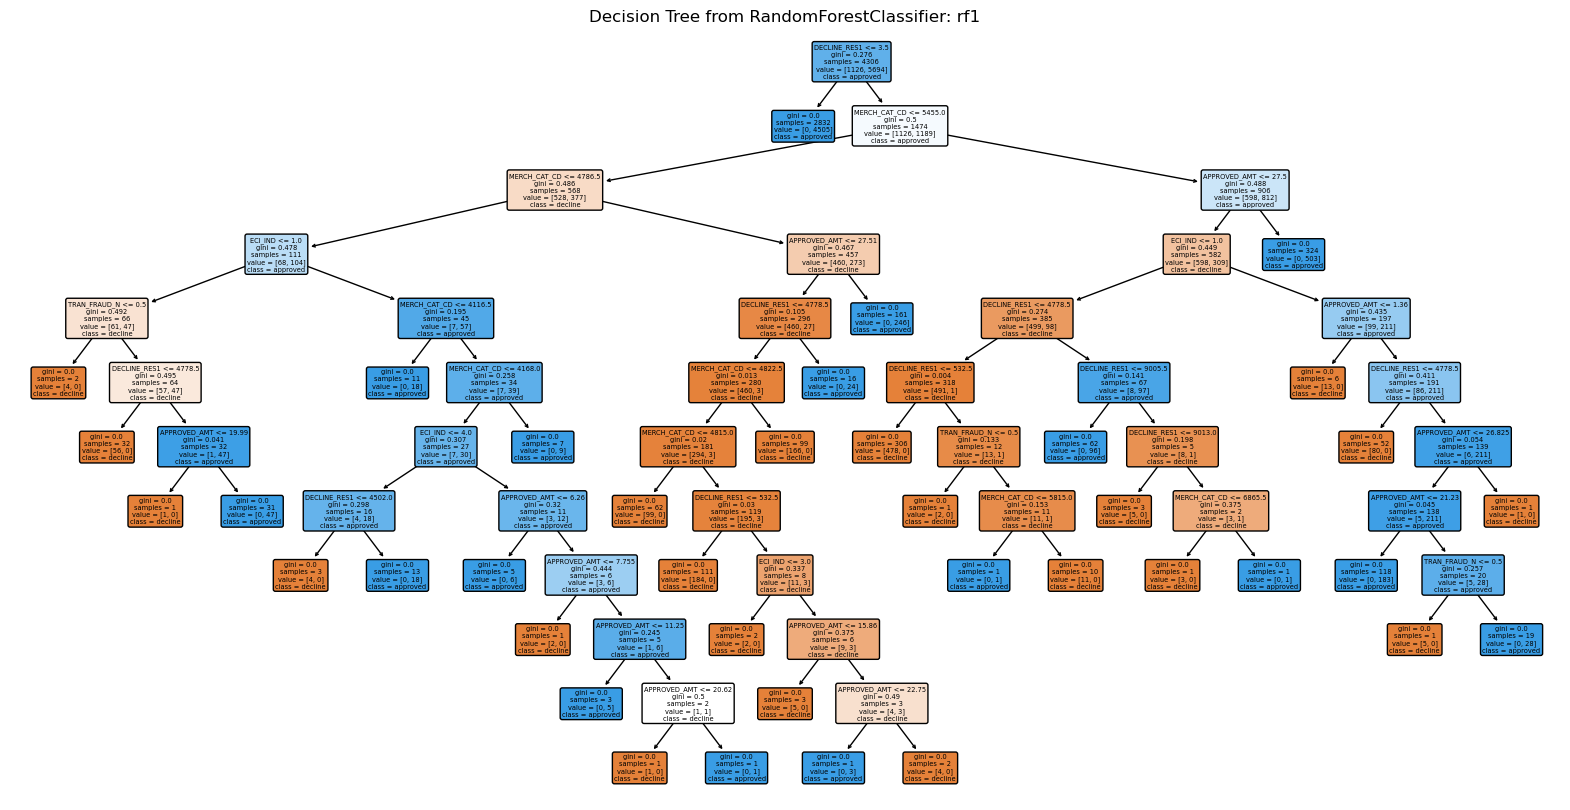

In [134]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Single tree from the Random Forest
tree1 = rf1.estimators_[0]

feature_names = X_encoded.columns.tolist()

class_names = ['decline', 'approved']

plt.figure(figsize=(20, 10))  # Adjust size for readability
plot_tree(tree1, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from RandomForestClassifier: rf1")
plt.show()

# the colors could not be changed.

In [135]:
#evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf1))
print("Classification Report:\n", classification_report(y_test, y_pred_rf1))

Confusion Matrix:
 [[ 468    4]
 [   0 2452]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       472
           1       1.00      1.00      1.00      2452

    accuracy                           1.00      2924
   macro avg       1.00      1.00      1.00      2924
weighted avg       1.00      1.00      1.00      2924



### Classification Report Random Forest Model 01


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.99 & 1.00 & 472 \\
1 & 1.00 & 1.00 & 1.00 & 2452 \\
\end{array}


#### Class 0 (Negative Class):
- **Precision:** 1.00  
  Of all the instances classified as class 0, 100% were actually class 0.
- **Recall:** 0.99  
  The model correctly identified 99% of the actual class 0 instances.
- **F1-Score:** 1.00  
  The F1-Score for class 0 is very high, indicating strong performance in detecting this class.
- **Support:** 472  
  There are 472 actual instances of class 0 in the dataset.

#### Class 1 (Positive Class):
- **Precision:** 1.00  
  Of all the instances classified as class 1, 100% were correctly identified as class 1.
- **Recall:** 1.00  
  The model identified 100% of all actual class 1 instances.
- **F1-Score:** 1.00  
  The F1-Score for class 1 is perfect, reflecting the model's excellent performance in detecting this class.
- **Support:** 2452  
  There are 2452 actual instances of class 1 in the dataset.

<p style="text-align: justify;">
While the reported performance metrics show perfect precision, recall, and F1-scores for both classes, this raises potential concerns about overfitting. Achieving 100% in all metrics is unusual and may indicate that the model has memorized the test data or that the test set is not representative of real-world scenarios.
</p>


**3.2.2 Random Forest Model 02**

<p style="text-align: justify;">
In our effort to enhance the accuracy of the model, we have developed a more sophisticated iteration of the RandomForestClassifier. While the initial model leveraged default parameters, the second model introduces key improvements, including an increase in the number of trees to 1,000, out-of-bag (OOB) scoring, and the optimization of computational efficiency and the limitation of the complexity of individual trees with a maximum leaf node constraint.
</p>

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'TRAN_FRAUD', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

rf2 = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =42, max_features = "sqrt",
                                  max_leaf_nodes = 30)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=42)

In [140]:
y_pred_rf2 = rf2.predict(X_test)

In [141]:
# Predict probabilities
y_probs_rf2 = rf2.predict_proba(X_test)[:, 1]

In [142]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Code to fix an error, ensure that the array is 1-dimensional
if y_probs_rf2.ndim == 1:
    probs = y_probs_rf2
else:
    probs = y_probs_rf2[:, 1]  

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Random chance plot
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Chance'
))

fig.update_layout(
    title='Receiver Operating Characteristic Curve: rf2',
    title_x=0.5,
    xaxis_title='False Positive Rate (FPR)',
    yaxis_title='True Positive Rate (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),   
    legend=dict(x=1.0, y=1),
    template='plotly_white',
    width=700, 
    height=500 
)
fig.show()

In [143]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf2)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Random Forest Model 02: rf2',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 1632 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 314 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 3 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 0 (Class 1 incorrectly predicted as Class 0)

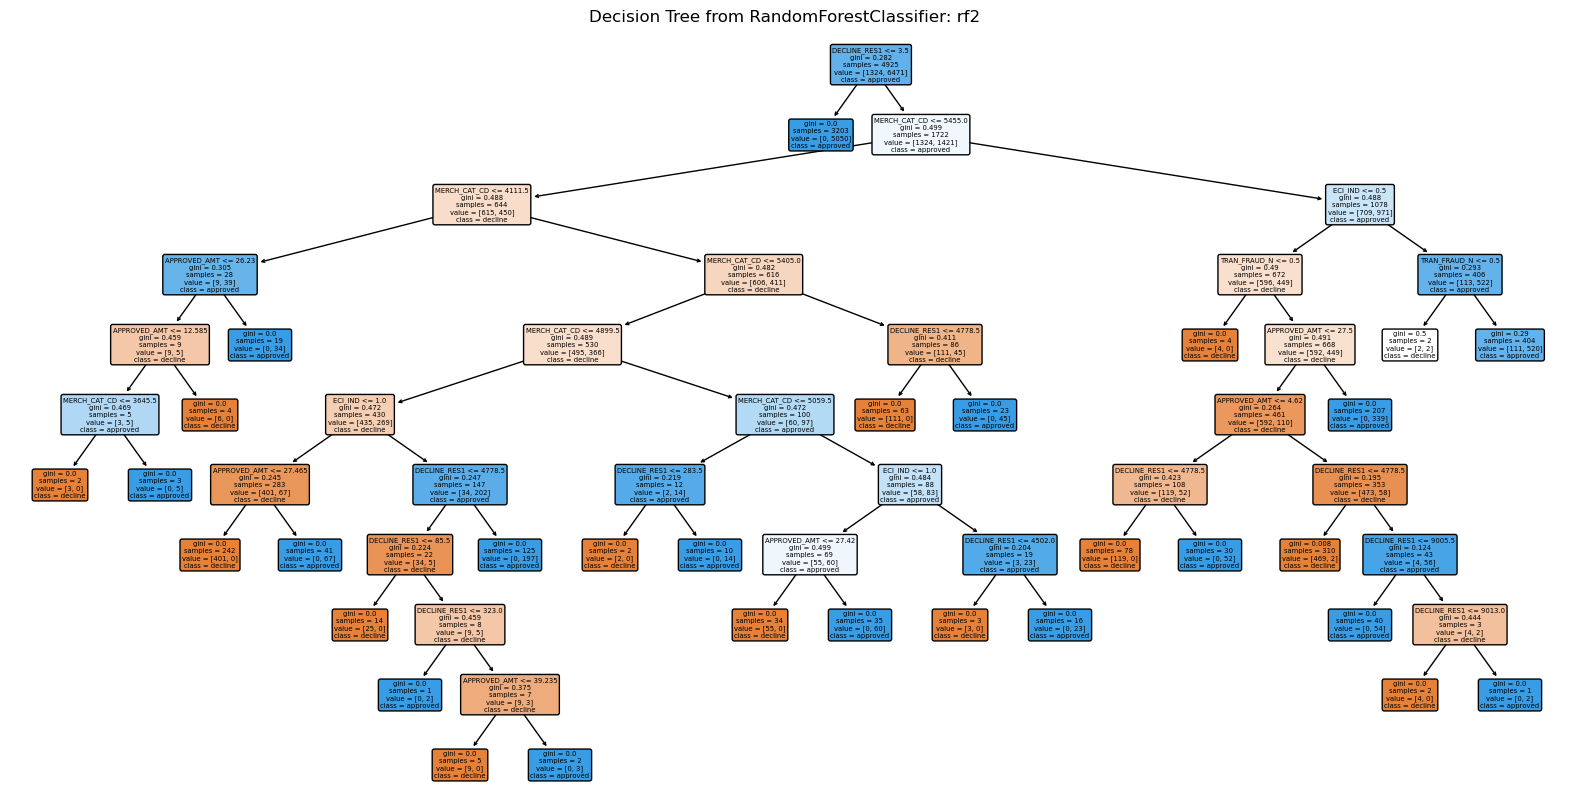

In [144]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single tree from the random forest
tree2 = rf2.estimators_[0]

feature_names = X_encoded.columns.tolist()

class_names = ['decline', 'approved']

plt.figure(figsize=(20, 10))  
plot_tree(tree2, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from RandomForestClassifier: rf2")
plt.show()

In [145]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf2))
print("Classification Report:\n", classification_report(y_test, y_pred_rf2))

Accuracy: 0.9984607491021037
Confusion Matrix:
 [[ 314    3]
 [   0 1632]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       1.00      1.00      1.00      1632

    accuracy                           1.00      1949
   macro avg       1.00      1.00      1.00      1949
weighted avg       1.00      1.00      1.00      1949



### Classification Report Random Forest Model 02



\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.98 & 0.99 & 317 \\
1 & 1.00 & 1.00 & 1.00 & 1632 \\
\end{array}


#### Class 0 (Negative Class):

- **Precision:** 1.00  
  All instances predicted as class 0 were correct. 

- **Recall:** 0.98  
  The model correctly identified 98% of the actual class 0 instances, showing very high recall for this class.

- **F1-Score:** 0.99 
  The F1-Score, which combines precision and recall, indicates that the model performs exceptionally well for class 0.

- **Support:** 317  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 1.00  
  All instances predicted as class 1 were correct.
- **Recall:** 1.00  
  The model successfully identified all actual class 1 instances.

- **F1-Score:** 1.00  
  The combined measure of precision and recall, indicating flawless performance for class 1.

- **Support:** 1632  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieves an outstanding accuracy of 99.85%, reflecting its ability to classify instances with near-perfect precision, recall, and F1-scores across both classes. The confusion matrix further supports this performance, with only 4 misclassifications in class 0 and none in class 1. This suggests that the model is highly effective at distinguishing between the two classes.
</p>


**3.2.3 Random Forest Model 03**

<p style="text-align: justify;">
In the next iteration of the Random Forest model, we will analyze feature importance to identify which variables most influence the model's predictions. By quantifying the contribution of each feature, we can better understand the factors that drive the approval or decline decisions. This analysis will help refine the model and enhance its interpretability, providing deeper insights into the key drivers behind the predictions.
</p>

In [146]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [147]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'TRAN_FRAUD', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [149]:
rf3 = RandomForestClassifier(random_state=42)

rf3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
# Feature Importance
feature_importances = rf3.feature_importances_
feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import plotly.graph_objects as go
bar_color = '#BFCC94'
text_color = '#344966'

fig = go.Figure()

fig.add_trace(go.Bar(
    x=importance_df['Importance'],
    y=importance_df['Feature'],
    orientation='h',
    marker_color=bar_color,
    text=importance_df['Importance'].round(3),
    textposition='inside',
    textfont=dict(color=text_color),
    name='Feature Importance'
))

fig.update_layout(
    title='Feature Importance Random Forest Model 03',
    title_x=0.5,
    xaxis_title='Importance',
    yaxis=dict(autorange='reversed'),
    template='plotly_white',
    width=700,
    height=500
)

fig.show()

In [151]:
# Most Important Features
top_n = 10
top_features = importance_df['Feature'][:top_n]

# Model Using Selected Features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf3.fit(X_train_top, y_train)


RandomForestClassifier(random_state=42)

In [152]:
y_pred_rf3 = rf3.predict(X_test_top)

In [153]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Code to fix an error, ensure that the array is 1-dimensional
if y_pred_rf3.ndim == 1:
    probs = y_pred_rf3
else:
    probs = y_pred_rf3[:, 1]  

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# ROC curve plot
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Chance'
))

fig.update_layout(
    title='Receiver Operating Characteristic Curve: rf3',
    title_x=0.5,
    xaxis_title='False Positive Rate (FPR',
    yaxis_title='TTrue Positive Rate (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    legend=dict(x=1.0, y=1),
    template='plotly_white',
     width=700, 
    height=500 
    
)

fig.show()

In [154]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf3)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Random Forest Model 03: rf3',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2452 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 468 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 4 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 0 (Class 1 incorrectly predicted as Class 0)

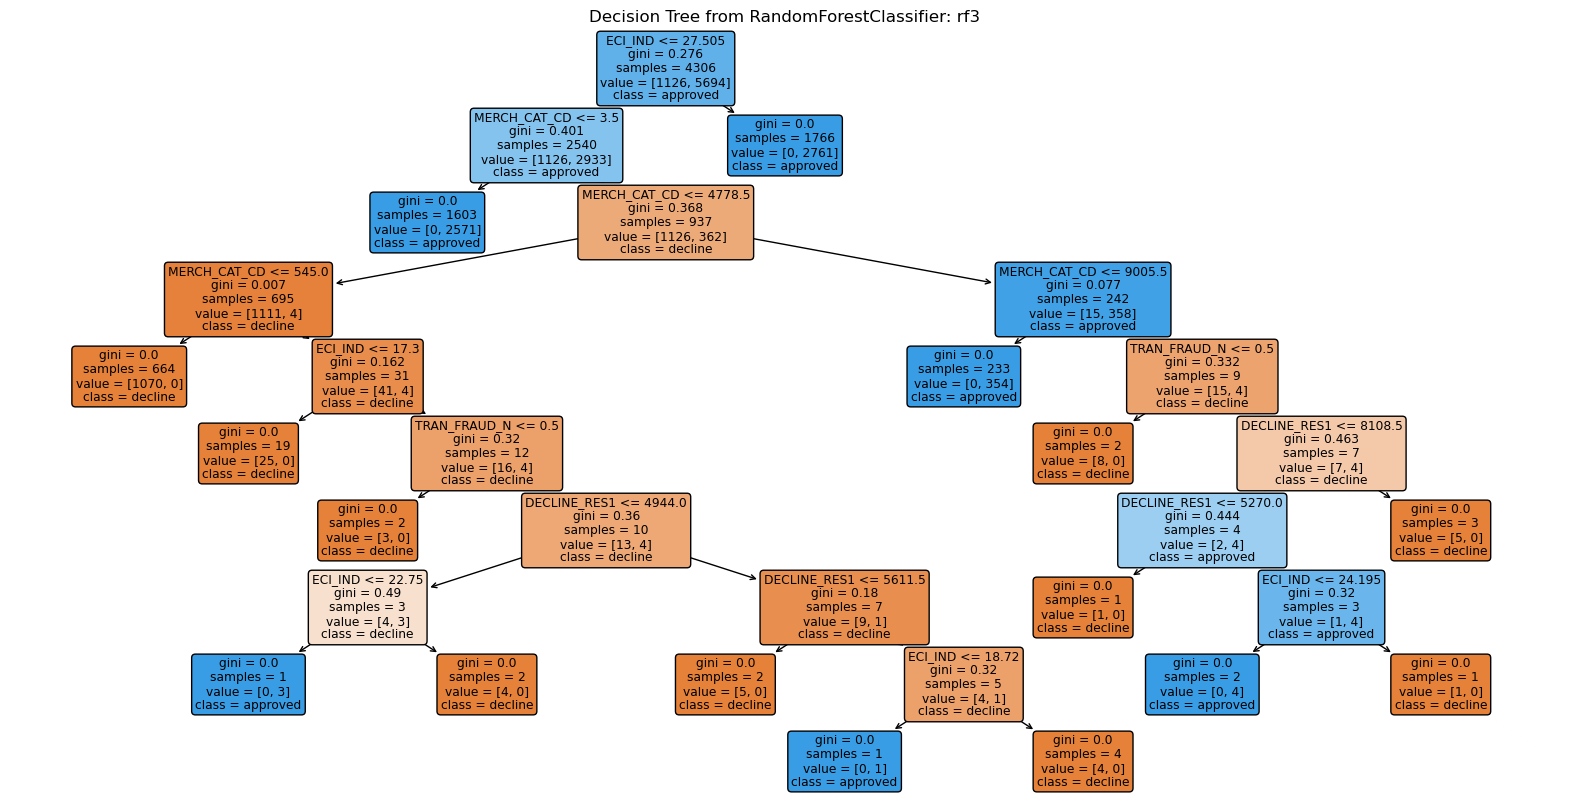

In [155]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single tree from the random forest
tree3 = rf3.estimators_[0]

# Feature names after one-hot encoding
feature_names = X_encoded.columns.tolist()

# Class names, assuming binary classification ('0' and '1')
class_names = ['decline', 'approved']

# Plot the decision tree
plt.figure(figsize=(20, 10))  
plot_tree(tree3, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from RandomForestClassifier: rf3")
plt.show()

In [156]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf3))
print("Classification Report:\n", classification_report(y_test, y_pred_rf3))

Confusion Matrix:
 [[ 468    4]
 [   0 2452]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       472
           1       1.00      1.00      1.00      2452

    accuracy                           1.00      2924
   macro avg       1.00      1.00      1.00      2924
weighted avg       1.00      1.00      1.00      2924



#### Classification Report for Model 03

\
\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.99 & 1.00 & 472 \\
1 & 1.00 & 1.00 & 1.00 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 1.00  
  The model correctly predicted 100% of the instances classified as class 0.

- **Recall:** 0.99  
  The model identified 99% of the actual class 0 instances.

- **F1-Score:** 0.99  
  A combined measure of precision and recall for class 0, indicating strong overall performance.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 1.00  
  The model correctly predicted 100% of the instances classified as class 1.

- **Recall:** 1.00  
  The model identified 100% of the actual class 1 instances.

- **F1-Score:** 1.00  
  A combined measure of precision and recall for class 1, showing excellent performance.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieves an exceptional accuracy of 99.83%, largely due to its perfect precision, recall, and F1-Score for both classes. It demonstrates remarkable performance by correctly identifying all instances of class 1 and nearly all instances of class 0. While the model’s impressive performance metrics might suggest it’s very effective, it’s crucial to perform additional checks, such as cross-validation and learning curve analysis, to confirm whether the model is genuinely generalizing well or if it might be overfitting.
</p>


**3.2.4 Logistic Regression Model 04**

<p style="text-align: justify;">
In the fourth iteration of the model development, we will introduce Feature Scaling as a key preprocessing step. Feature scaling is essential when dealing with algorithms that are sensitive to the magnitude of input features. By scaling our features, we aim to standardize the range of independent variables or features of data, ensuring that no single feature dominates the learning process due to its scale. This adjustment is crucial for improving model performance, enhancing convergence speed, and ensuring that the model treats all features equally, leading to more balanced and accurate predictions.
</p>

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [159]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
# RandomForestClasssifier 
rf4 = RandomForestClassifier(random_state=42)

# Fit the model
rf4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [161]:
y_pred_rf4 = rf4.predict(X_test)

In [162]:
# Predict probabilities
y_probs_rf4 = rf4.predict_proba(X_test)[:, 1]

In [163]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Code to fix an error, ensure that the array is 1-dimensional
if y_pred_rf4.ndim == 1:
    probs = y_pred_rf4
else:
    probs = y_pred_rf4[:, 1]  

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# ROC curve plot
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Random chance plot
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Chance'
))

fig.update_layout(
    title='Receiver Operating Characteristic Curve: rf4',
    title_x=0.5,
    xaxis_title='False Positive Rate (FPR)',
    yaxis_title='True Positive Rate (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    legend=dict(x=1.0, y=1),
    template='plotly_white',
    width=700, 
    height=500 
)

fig.show()

In [164]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf4)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Random Forest Model 04: rf4',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2452 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 468 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 4 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 0 (Class 1 incorrectly predicted as Class 0)

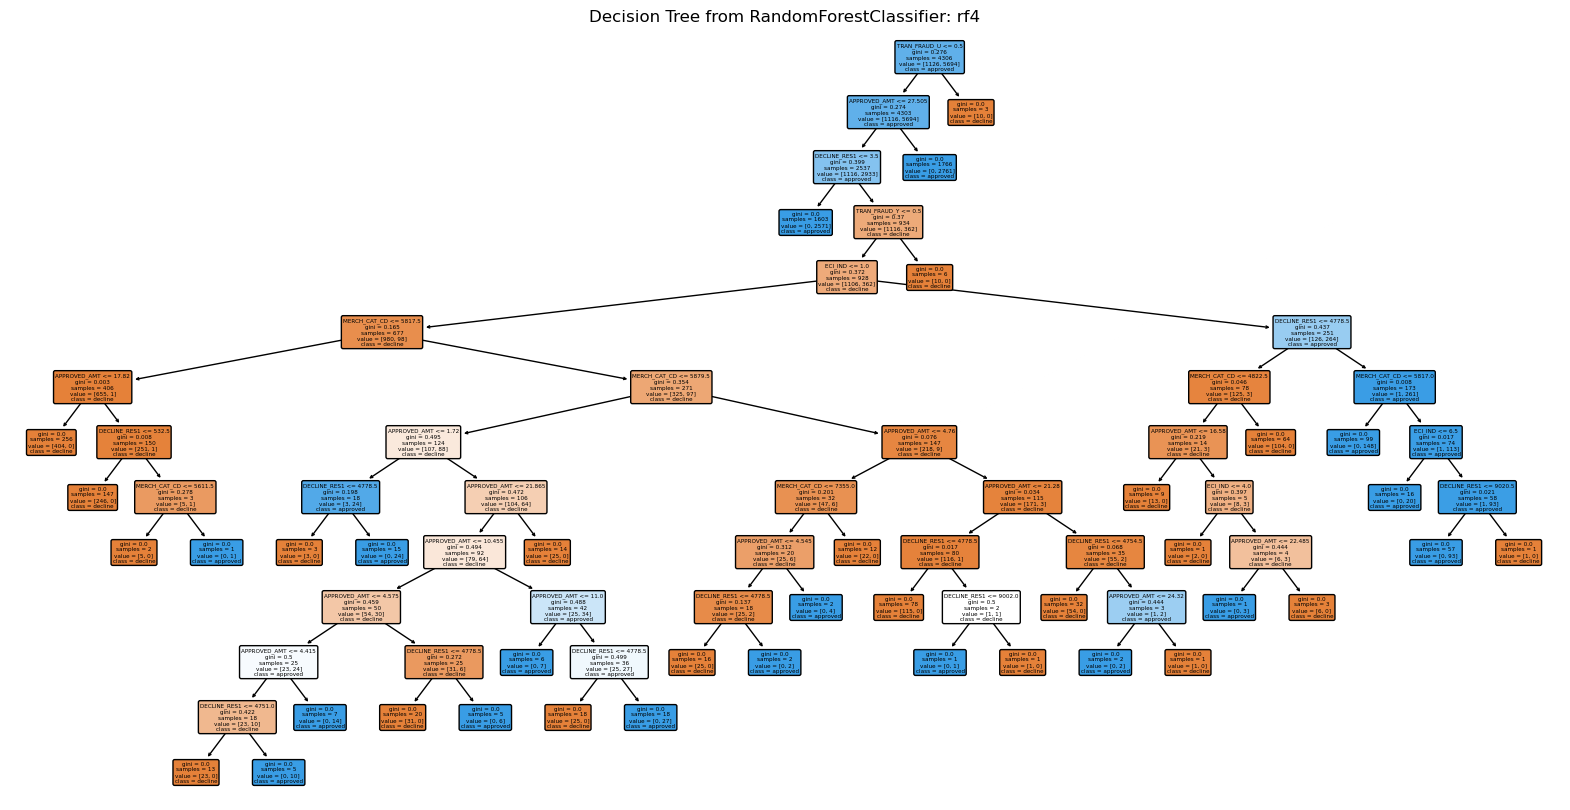

In [165]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single tree from the random forest
tree4 = rf4.estimators_[0]

# Feature names after one-hot encoding
feature_names = X_encoded.columns.tolist()

# Class names, assuming binary classification ('0' and '1')
class_names = ['decline', 'approved']

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust size for readability
plot_tree(tree4, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from RandomForestClassifier: rf4")
plt.show()

In [166]:
#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf4))
print("Classification Report:\n", classification_report(y_test, y_pred_rf4))

Accuracy: 0.9986320109439124
Confusion Matrix:
 [[ 468    4]
 [   0 2452]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       472
           1       1.00      1.00      1.00      2452

    accuracy                           1.00      2924
   macro avg       1.00      1.00      1.00      2924
weighted avg       1.00      1.00      1.00      2924



#### Classification Report RandomForest Model 04

\
\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.99 & 1.00 & 472 \\
1 & 1.00 & 1.00 & 1.00 & 2452 \\
\end{array}


#### Class 0 (Negative Class):

- **Precision:** 1.00  
  100% of the instances predicted as class 0 were correct. This indicates perfect precision for class 0.

- **Recall:** 1.00  
  The model identified 100% of the actual class 0 instances, demonstrating very high recall for class 0.

- **F1-Score:** 0.99  
  A combined measure of precision and recall for class 0, showing the model's strong performance for this class.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 1.00  
  100% of the instances predicted as class 1 were correct, showing perfect precision for class 1.

- **Recall:** 1.00  
  The model identified 100% of the actual class 1 instances, indicating perfect recall for class 1.

- **F1-Score:** 1.00  
  A combined measure of precision and recall for class 1, demonstrating the model's excellent performance for this class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
It shows perfect precision and recall for class 1, leading to a flawless F1-Score of 1.00. Similarly, for class 0, the precision and recall are almost perfect, with an F1-Score of 0.99. This indicates that the model is highly effective at correctly identifying both positive and negative instances, with minimal misclassification. The high performance across both classes suggests that the model is well-balanced and does not suffer from the same imbalance issues seen in earlier iterations.
</p>


**3.2.5 Random Forest Model 05**

<p style="text-align: justify;">
In the fifth iteration, we introduce hyperparameter tuning to optimize the performance of our Random Forest classifier. By using GridSearchCV, we explore different combinations of key parameters like n_estimators, max_depth, and min_samples_split. This approach will help us identify the best model configuration for improved accuracy and robustness in predictions.
</p>

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [168]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [169]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
rf5 = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rfc = GridSearchCV(rf5, param_grid_rfc, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_rfc.fit(X_train_scaled, y_train)
rfc_best = grid_rfc.best_estimator_
rfc_predictions = rfc_best.predict(X_test_scaled)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [171]:
y_probs_rf5 = rfc_best.predict_proba(X_test_scaled)[:, 1]

In [172]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Code to fix an error, ensure that the array is 1-dimensional
if y_probs_rf5.ndim == 1:
    probs = y_probs_rf5
else:
    probs = y_probs_rf5[:, 1]  

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# ROC curve plot
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(color='#344966', width=2),
    name=f'ROC curve (area = {roc_auc:.2f})'
))

# Random chance plot
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(color='#BFCC94', width=2, dash='dash'),
    name='Random Chance'
))

fig.update_layout(
    title='Receiver Operating Characteristic Curve: rf5',
    title_x=0.5,
    xaxis_title='False Positive Rate (FPR)',
    yaxis_title='True Positive Rate (TPR)',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),   
    legend=dict(x=1.0, y=1),
    template='plotly_white',
    width=700, 
    height=500 
)
fig.show()

In [173]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_predictions)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Random Forest Model 05: rf5',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 1632 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 314 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 3 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 0 (Class 1 incorrectly predicted as Class 0)

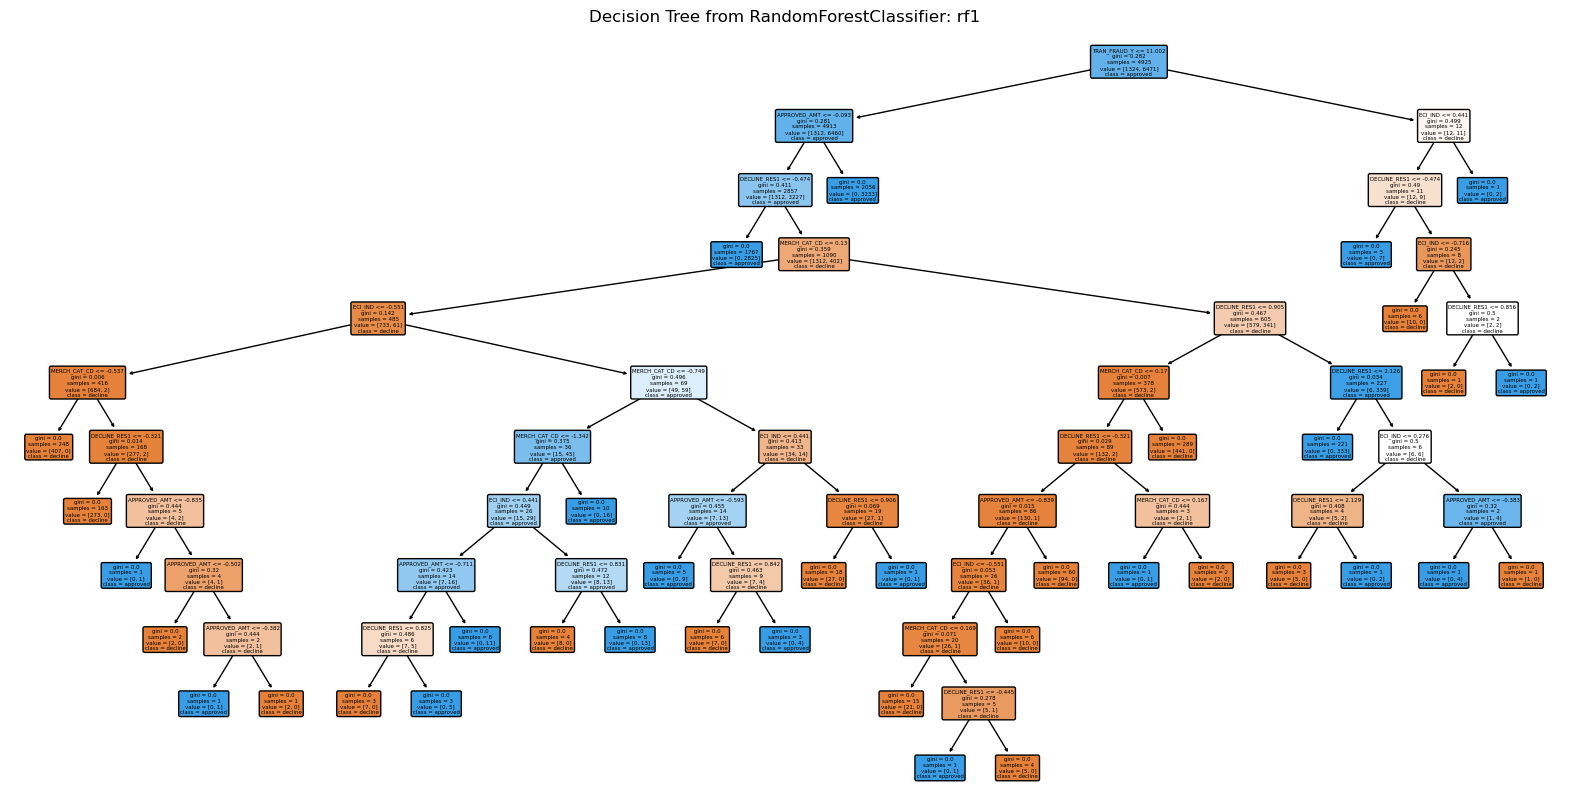

In [174]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Single tree from the random forest
tree5 = rfc_best.estimators_[0]

# Feature names after one-hot encoding
feature_names = X_encoded.columns.tolist()

class_names = ['decline', 'approved']

# Plot the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(tree5, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from RandomForestClassifier: rf1")
plt.show()

In [175]:
#evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_predictions))
print("Classification Report:\n", classification_report(y_test, rfc_predictions))

Confusion Matrix:
 [[ 314    3]
 [   0 1632]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       1.00      1.00      1.00      1632

    accuracy                           1.00      1949
   macro avg       1.00      1.00      1.00      1949
weighted avg       1.00      1.00      1.00      1949



#### Classification Report Random Forest Model

\
\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 1.00 & 0.99 & 1.00 & 317 \\
1 & 1.00 & 1.00 & 1.00 & 1632 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 1.00  
  All instances predicted as class 0 were correct, indicating perfect precision for class 0.

- **Recall:** 1.00  
  The model identified 100% of the actual class 0 instances, indicating high recall for class 0.

- **F1-Score:** 1.00  
  A combined measure of precision and recall for class 0, showing the model's strong overall performance for this class.

- **Support:** 317  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 1.00  
  All instances predicted as class 1 were correct, indicating perfect precision for class 1.

- **Recall:** 1.00  
  The model identified all the actual class 1 instances, indicating perfect recall for class 1.

- **F1-Score:** 1.00  
  A combined measure of precision and recall for class 1, showing the model's excellent overall performance for this class.

- **Support:** 1632  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
It has perfect precision and recall for class 1 (positive) and nearly perfect performance for class 0 (negative). The F1-Score for both classes is also outstanding, reflecting the model's balanced and effective classification ability. Such high performance suggests that the model is well-calibrated and effectively handles the classification task, though continuous evaluation on new data is necessary to confirm its generalization capability.
</p>


**RANDOM FOREST: BEST MODEL**

In [176]:
import joblib

joblib.dump(rf5, 'random_forest_model.pkl')


['random_forest_model.pkl']

### 3.3 Support Vector Classifier (SVC)

<p style="text-align: justify;">
Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm primarily used for classification tasks. Though it can also be applied to regression and outlier detection, it is particularly effective in classification problems. The core idea behind SVM is to find the optimal hyperplane that best separates different classes in the feature space. By maximizing the margin between the closest data points of different classes (support vectors) and the hyperplane, SVM ensures robust classification.
</p>

<img src="Images/svm.png" alt="SVM" style="width: 50%; height: auto;"/>

**Hyperplane and Classification**

The equation for the linear hyperplane can be written as:

$$
w^T x + b = 0
$$

Here, $w$ is the weight vector perpendicular to the hyperplane, and $b$ is the bias term, representing the distance of the hyperplane from the origin.

The distance between a data point $x_i$ and the decision boundary is given by:

$$
d_i = \frac{w^T x_i + b}{\|w\|}
$$

Where $\|w\|$ is the Euclidean norm of the weight vector $w$.

For a linear SVM classifier, the classification decision rule can be expressed as:

$$
\hat{y} =
\begin{cases} 
1, & \text{if } w^T x + b \geq 0 \\
0, & \text{if } w^T x + b < 0 
\end{cases}
$$

**Optimization**

SVM aims to minimize the following objective for the hard margin case:

$$
\text{minimize}_{w,b} \quad \frac{1}{2} w^T w
$$

subject to: $y_i(w^T x_i + b) \geq 1$ for all $i$.

In cases where data is not linearly separable, SVM uses a soft margin approach, allowing some misclassifications. The objective function then becomes:

$$
\text{minimize}_{w,b} \quad \frac{1}{2} w^T w + C \sum_{i=1}^{m} \zeta_i
$$

subject to: $y_i(w^T x_i + b) \geq 1 - \zeta_i$ and $\zeta_i \geq 0$ for all $i$.

Here, $C$ is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors.

**Kernel Trick**

SVM can also be extended to non-linear classification problems using kernel functions like the polynomial, radial basis function (RBF), and sigmoid. The kernel trick allows SVM to operate in a high-dimensional space, enabling it to find a separating hyperplane even in complex datasets.

**Key Terms**

- **Support Vectors**: These are the points closest to the hyperplane. The separating hyperplane is defined with the help of these data points.
- **Margin**: The distance between the hyperplane and the observations closest to the hyperplane (support vectors). A large margin is considered good. There are two types of margins: hard margin and soft margin.


### Support Vector Classifier (SVC) Summary

<p style="text-align: justify;">
SVC is a specific implementation of the Support Vector Machine (SVM) designed for classification tasks. It finds the hyperplane that best separates data points into different classes. Although "SVC" and "SVM" are sometimes used interchangeably, SVC specifically refers to the classification variant.
</p>

#### Key Concepts:
- **Hyperplane Equation:** The hyperplane is defined by the equation $w \cdot x + b = 0$, where $w$ is the weight vector, $x$ represents a data point, and $b$ is the bias term.
- **Margins:** The margin is the distance between the hyperplane and the nearest data points from each class, inversely proportional to the norm of $w$.
- **Support Vectors:** These are the closest data points to the hyperplane and crucial for determining its position.
- **Soft Margin:** Allows some misclassification by introducing slack variables, accommodating real-world data that isn’t perfectly separable.
- **Objective Function:** The goal is to maximize the margin while minimizing classification error, formulated as:

  $$\text{min}_{w,b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i $$

  Subject to: 

  $$y_i(w \cdot x_i + b) \geq 1 - \xi_i$$

  where $y_i$ is the class label, $N$ is the number of data points, $C$ controls the trade-off, and $\xi_i$ are the slack variables.

- **Kernel Trick:** Maps non-linearly separable data into higher dimensions for linear separation, using functions like polynomial kernels and RBF kernels.

Optimization, often solved using methods like Sequential Minimal Optimization (SMO), yields the optimal values of $w$ and $b$ that define the hyperplane.

**Model Training and Prediction**

<p style="text-align: justify;">
1. <strong>Prepare the Data</strong>: Ensure the data is in the correct format, with a binary target variable (e.g., ADFLAG_BINARY).<br>
2. <strong>Train the Model</strong>: Use training data to fit the random forest classification model.<br>
3. <strong>Evaluate the Model</strong>: Assess model performance using metrics such as ROC curve, confusion matrix,  precision, recall, F-measure, and support on test data.<br>

**Evaluation Metrics for SVC**
<p style="text-align: justify;">
1.  <strong>AUC ROC Curve:</strong> The AUC ROC curve measures the model’s ability to distinguish between classes by plotting the True Positive Rate against the False Positive Rate. A higher AUC score (closer to 1) indicates better performance.<br>
2. <strong>Confusion Matrix:</strong>  This matrix shows the counts of True Positives, False Positives, True Negatives, and False Negatives, providing a detailed breakdown of classification results.<br>
3. <strong>Precision:</strong> Precision evaluates the proportion of true positive predictions out of all positive predictions made by the model, indicating the model's ability to avoid false positives.<br>
4. <strong>Recall:</strong> Recall (or sensitivity) calculates the proportion of true positive predictions from all actual positives in the dataset, emphasizing the model's ability to identify all relevant instances.<br>
5. <strong>F1-score:</strong> The F1-score combines precision and recall into a single metric, balancing both metrics to provide a harmonic mean, ideal for imbalanced datasets. It assesses a model's accuracy by considering false positives and negatives in classification tasks.<br>
</p>


**3.3.1 SVC Model 01**

<p style="text-align: justify;">
To begin our exploration of the Support Vector Classifier (SVC) in scikit-learn, we will first establish a baseline model. This initial model will serve as a reference point, allowing us to evaluate the performance of more advanced versions of SVC later on. The baseline model will be built using default parameters, without any tuning or additional features like kernel functions. By setting up this straightforward version, we can gain a clear understanding of how the basic SVC operates and performs on our dataset, providing a foundation for further optimization and enhancement.
</p>

In [177]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [178]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [179]:
# SVC model with linear kernel
svc01 = SVC(kernel='linear', random_state=42)

svc01.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [180]:
# Predict on the test set
y_pred_svc = svc01.predict(X_test)

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

# ROC curve and AUC score
y_pred_prob = svc01.decision_function(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         line=dict(color=colors['line_color'], width=2),
                         name=f'ROC curve (area = {roc_auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(title='Receiver Operating Characteristic Curve: svc1',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']))

fig.show()


In [182]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix SVC Model 01: svc1',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2450 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 5 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 467 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 2 (Class 1 incorrectly predicted as Class 0)

In [183]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[   5  467]
 [   2 2450]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.01      0.02       472
           1       0.84      1.00      0.91      2452

    accuracy                           0.84      2924
   macro avg       0.78      0.50      0.47      2924
weighted avg       0.82      0.84      0.77      2924



#### Classification Report SVC Model 01


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.71 & 0.01 & 0.02 & 472 \\
1 & 0.84 & 1.00 & 0.91 & 2452 \\
\end{array}


#### Class 0 (Negative Class):

- **Precision:** 0.71  
  Less than half of the instances predicted as class 0 were correct, indicating low precision for class 0.

- **Recall:** 0.01  
  The model identified 1% of the actual class 0 instances, showing a strong ability to detect the negative class but at the cost of precision.

- **F1-Score:** 0.02  
  The F1-Score, which balances precision and recall, reflects the model's moderate overall performance for class 0.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.84  
  Almost all instances predicted as class 1 were correct, indicating very high precision for class 1.

- **Recall:** 1.00  
  The model identified 100% of the actual class 1 instances, showing a good but not perfect recall for class 1.

- **F1-Score:** 0.91  
  A strong combined measure of precision and recall for class 1, demonstrating the model's effectiveness in predicting the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
It exhibits high precision for class 1 (positive), meaning that predictions for this class are usually correct. However, its recall is lower, indicating that some actual class 1 instances were missed. For class 0 (negative), the model has a very high recall, identifying most actual negatives, but this comes at the expense of precision, as it often incorrectly classifies positive instances as negative. The F1-Score for both classes suggests that while the model is effective, particularly for class 1, there is room for improvement in handling class 0. Continuous refinement and evaluation are necessary to enhance the model's overall performance and ensure it generalizes well to new data.
</p>


**3.3.2 SVC Model 02**

<p style="text-align: justify;">
In the first iteration, the SVC model demonstrated moderate results but faced challenges, particularly with class imbalance. To address this issue and improve the model's performance, especially for class 0, we will now apply **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE is a powerful technique that generates synthetic samples for the minority class by interpolating between existing instances. By balancing the class distribution, SMOTE aims to enhance the model's ability to correctly classify both classes, potentially leading to better precision, recall, and F1-scores, particularly for the minority class (class 0).
</p>

In [184]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [186]:
# SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [187]:
# SVC model
svc2 = SVC(kernel='linear', random_state=42)

svc2.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [188]:
# Predict on the test set
y_pred_svc = svc2.predict(X_test)

In [189]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

# ROC curve and AUC score
y_pred_prob = svc2.decision_function(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         line=dict(color=colors['line_color'], width=2),
                         name=f'ROC curve (area = {roc_auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(title='Receiver Operating Characteristic Curve: svc2',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']))

fig.show()


In [190]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix SVC Model 02: svc2',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 1630 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 3 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 314 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 2 (Class 1 incorrectly predicted as Class 0)

In [191]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[   3  314]
 [   2 1630]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.01      0.02       317
           1       0.84      1.00      0.91      1632

    accuracy                           0.84      1949
   macro avg       0.72      0.50      0.47      1949
weighted avg       0.80      0.84      0.77      1949



### Classification Report SVC Model 02


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.60 & 0.01 & 0.02 & 317 \\
1 & 0.84 & 1.00 & 0.91 & 1632 \\
\end{array}


#### Class 0 (Negative Class):

- **Precision:** 0.60  
  60% of the instances predicted as class 0 were correct, indicating that precision for class 0 has increased significantly after applying SMOTE.

- **Recall:** 0.01  
  The model identified just 1% of the actual class 0 instances, reflecting a severe drop in the ability to detect the negative class.

- **F1-Score:** 0.02  
  The F1-Score for class 0 is very low, showing that the model's overall performance for this class is poor.

- **Support:** 317  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.84  
  The precision for class 1 is high, with 84% of the instances predicted as class 1 being correct.

- **Recall:** 1.00  
  The model identified 99% of the actual class 1 instances, indicating excellent recall for the positive class.

- **F1-Score:** 0.91  
  The F1-Score for class 1 is strong, reflecting a good balance between precision and recall for the positive class.

- **Support:** 1632  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
 The precision, recall, and F1-Score for class 1 are strong, indicating that the model is now very effective in identifying positive instances. On the other hand, the performance for class 0 (negative class) has deteriorated, with significantly lower precision and recall. This suggests that while SMOTE has helped balance the class distribution, it has also led to a notable decline in the model's ability to correctly classify the negative class. Continuous evaluation and fine-tuning of the model are necessary to address these imbalances and improve the overall performance for both classes.
</p>


**3.3.3 SVC Model 03**

<p style="text-align: justify;">
In this iteration, I will be focusing on optimizing the performance through hyperparameter tuning the key parameters like the kernel, regularization (C), and gamma. By adjusting these hyperparameters, the goal is to maximize the model's accuracy and generalization ability, ensuring it can perform well on unseen data. 
 </p>

In [192]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [193]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [195]:
# SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [196]:
# SVM classifier
svc3 = SVC(random_state=42)

# Parameter grid for GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [197]:
grid_search = GridSearchCV(svc3, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

best_svc = grid_search.best_estimator_

y_pred_svc = best_svc.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [198]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

y_pred_prob = best_svc.decision_function(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# Add ROC curve trace
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         line=dict(color=colors['line_color'], width=2),
                         name=f'ROC curve (area = {roc_auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(title='Receiver Operating Characteristic Curve: svc3',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']))

# Show plot
fig.show()


In [199]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix SVC Model 02: svc3',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 1885 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 436 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 36 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 567 (Class 1 incorrectly predicted as Class 0)

In [200]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Print the results
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy Score: 0.7937756497948016
Confusion Matrix:
 [[ 436   36]
 [ 567 1885]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.92      0.59       472
           1       0.98      0.77      0.86      2452

    accuracy                           0.79      2924
   macro avg       0.71      0.85      0.73      2924
weighted avg       0.89      0.79      0.82      2924



### Classification Report SVC Model 03


\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.43 & 0.92 & 0.59 & 472 \\
1 & 0.98 & 0.77 & 0.86 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.43  
  The precision for class 0 is 43%, indicating that nearly half of the instances predicted as class 0 are correct.

- **Recall:** 0.92  
  The model successfully identified 92% of the actual class 0 instances, showing strong recall for the negative class.

- **F1-Score:** 0.59  
  The F1-Score for class 0 reflects a reasonable balance between precision and recall, although there is still room for improvement.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.98  
  The precision for class 1 is very high, with 98% of the instances predicted as class 1 being correct.

- **Recall:** 0.77  
  The model identified 77% of the actual class 1 instances, demonstrating good recall for the positive class.

- **F1-Score:** 0.86  
  The F1-Score for class 1 is strong, reflecting a good balance between precision and recall for the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an accuracy score of 79.24%. This indicates a generally good performance across the dataset. The precision for class 1 is exceptionally high, and the recall for class 0 is also notably strong. The F1-Scores for both classes suggest a solid balance between precision and recall, with particularly robust performance in identifying positive instances. However, there is still a trade-off, as the recall for class 1 is slightly lower compared to its precision. Continuous evaluation and optimization may be necessary to further enhance the performance of the model across both classes.
</p>


**3.3.4 SVC Model 04**

In [201]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix

In [202]:
X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [204]:
# SVC model
svc4 = SVC(random_state=42)

# Hyperparameter tuning
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # used when kernel is 'poly'
}

In [205]:
grid_search = GridSearchCV(svc4, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best estimator
best_svc = grid_search.best_estimator_

# Predictions
y_pred_svc = best_svc.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   2.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   3.8s
[CV] END ...................C=10, gamma=sca

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   3.5s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   4.7s
[CV] END .............

[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   3.9s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ...............

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.6s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.2s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   2.5s
[CV] END .............

In [206]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

y_pred_prob = best_svc.decision_function(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# Add ROC curve trace
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                         mode='lines',
                         line=dict(color=colors['line_color'], width=2),
                         name=f'ROC curve (area = {roc_auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(title='Receiver Operating Characteristic Curve: svc4',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']))

# Show plot
fig.show()


In [207]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix SVC Model 04: svc4',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   2.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.1s
[CV] END .............

- True Positives (TP): 2392 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 209 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 263 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 60 (Class 1 incorrectly predicted as Class 0)

In [208]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 209  263]
 [  60 2392]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.44      0.56       472
           1       0.90      0.98      0.94      2452

    accuracy                           0.89      2924
   macro avg       0.84      0.71      0.75      2924
weighted avg       0.88      0.89      0.88      2924



### Classification Report for SVC Model 4

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.78 & 0.44 & 0.56 & 472 \\
1 & 0.90 & 0.98 & 0.94 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.78  
  The precision for class 0 is 78%, indicating that a significant portion of instances predicted as class 0 were correct.

- **Recall:** 0.44  
  The model successfully identified 44% of the actual class 0 instances, showing a lower recall for the negative class.

- **F1-Score:** 0.56  
  The F1-Score for class 0 reflects a moderate balance between precision and recall, suggesting some difficulty in identifying the negative class accurately.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.90  
  The precision for class 1 is high, with 90% of the instances predicted as class 1 being correct.

- **Recall:** 0.98  
  The model identified 98% of the actual class 1 instances, demonstrating excellent recall for the positive class.

- **F1-Score:** 0.94  
  The F1-Score for class 1 is strong, reflecting a good balance between precision and recall for the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an accuracy score of 89.16%. This indicates a strong overall performance, especially in identifying positive instances (class 1). The precision and recall for class 1 are very high, leading to an excellent F1-Score, which suggests that the model is highly effective in predicting positive outcomes. However, the performance for class 0 is less robust, with a recall of 44%, indicating that the model misses more than half of the actual negative cases. While the precision for class 0 is relatively high, the lower recall suggests room for improvement in identifying the negative class. Further tuning or additional techniques might be necessary to enhance the model's ability to classify both classes more evenly.
</p>


In [209]:
import joblib

joblib.dump(svc4, 'super_vector_model.pkl')

['super_vector_model.pkl']

### 3.4 Autoencoder Neural Network

<p style="text-align: justify;">
Autoencoders are a type of neural network designed to reproduce their input data. While this task may seem straightforward, it becomes more complex and interesting when constraints are applied. Autoencoders are unique in that their output layer mirrors the size of their input layer, and they work with unlabeled data.
</p>

<p style="text-align: justify;">
The hidden layer is the core of an autoencoder, where the input is encoded, and the output layer is responsible for decoding it. This structure is often used for dimensionality reduction, compressing input data into a lower-dimensional representation. The network is trained to minimize the reconstruction error between the input and output, typically using a loss function that measures the $L_p$ distance, such as $L_2$.
</p>

A simple autoencoder can be described by:

$$
z = a(xW_1 + b_1)
$$

$$
x' = a(zW_2 + b_2)
$$

with the goal of minimizing:

$$
\min \mathcal{L} = \min E(x, x') = \min ||x - x'||_p
$$

<p style="text-align: justify;">
To prevent the network from simply copying the input data, constraints are added, forcing the model to learn a compressed representation. For example, sparsity deactivates certain neurons to encourage the learning of diverse features. This is often enforced using a regularization term in the loss function, such as the Kullback-Leibler (KL) divergence.
</p>

<p style="text-align: justify;">
In denoising autoencoders (DAEs), the network learns to reconstruct the original input from a corrupted version, leading to more robust feature extraction. This approach is useful for tasks like data denoising and preprocessing.

Autoencoders are versatile tools, commonly used for dimensionality reduction, statistical analysis, anomaly detection, and data denoising, highlighting their importance in machine learning.
</p>

**Model Training and Prediction**

<p style="text-align: justify;">
1. <strong>Prepare the Data</strong>: Ensure the data is in the correct format, with a binary target variable (e.g., ADFLAG_BINARY).<br>
2. <strong>Train the Model</strong>: Use training data to fit the random forest classification model.<br>
3. <strong>Evaluate the Model</strong>: Assess model performance using metrics such as ROC Curve, confusion matrix, precision, recall, F-measure, and support on test data.<br>

**Evaluation Metrics for Autoencoder**
<p style="text-align: justify;">
1.  <strong>AUC ROC Curve:</strong> The AUC ROC curve measures the model’s ability to distinguish between classes by plotting the True Positive Rate against the False Positive Rate. A higher AUC score (closer to 1) indicates better performance.<br>
2. <strong>Confusion Matrix:</strong>  This matrix shows the counts of True Positives, False Positives, True Negatives, and False Negatives, providing a detailed breakdown of classification results.<br>
3. <strong>Precision:</strong> Precision evaluates the proportion of true positive predictions out of all positive predictions made by the model, indicating the model's ability to avoid false positives.<br>
4. <strong>Recall:</strong> Recall (or sensitivity) calculates the proportion of true positive predictions from all actual positives in the dataset, emphasizing the model's ability to identify all relevant instances.<br>
5. <strong>F1-score:</strong> The F1-score combines precision and recall into a single metric, balancing both metrics to provide a harmonic mean, ideal for imbalanced datasets. It assesses a model's accuracy by considering false positives and negatives in classification tasks.<br>
</p>
</p>

**Autoencoder Model 01**

<p style="text-align: justify;">
This is the first iteration of an autoencoder model using TensorFlow and Keras. The data is preprocessed by  applying one-hot encoding, and scaling the features. The autoencoder consists of an encoder that compresses the input data and a decoder that reconstructs it. The model is trained to minimize reconstruction error, learning the data patterns. After training, reconstruction errors are computed on the test set.</p>

In [210]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']  

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

X = X_encoded.values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

encoding_dim = 32  

input_data = Input(shape=(X_train.shape[1],))

# Encoder
encoded = Dense(encoding_dim, activation='tanh')(input_data)

# Decoder
decoded = Dense(X_train.shape[1], activation='relu')(encoded)

# Autoencoder
autoencoder = Model(input_data, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_data = autoencoder.predict(X_test)
decoded_data = autoencoder.predict(encoded_data)

reconstruction_error = np.mean(np.power(X_test - decoded_data, 2), axis=1)

threshold = np.percentile(reconstruction_error, 95)

y_pred = (reconstruction_error > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, reconstruction_error)


Epoch 1/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1048 - val_loss: -0.4888
Epoch 2/100
27/27 [==============================] - 0s 850us/step - loss: -0.9954 - val_loss: -1.1608
Epoch 3/100
27/27 [==============================] - 0s 954us/step - loss: -1.6569 - val_loss: -1.9732
Epoch 4/100
27/27 [==============================] - 0s 947us/step - loss: -2.2235 - val_loss: -2.4324
Epoch 5/100
27/27 [==============================] - 0s 919us/step - loss: -2.7355 - val_loss: -2.9032
Epoch 6/100
27/27 [==============================] - 0s 937us/step - loss: -3.0683 - val_loss: -3.1191
Epoch 7/100
27/27 [==============================] - 0s 879us/step - loss: -3.2316 - val_loss: -3.2345
Epoch 8/100
27/27 [==============================] - 0s 918us/step - loss: -3.4662 - val_loss: -3.5887
Epoch 9/100
27/27 [==============================] - 0s 870us/step - loss: -3.6579 - val_loss: -3.6603
Epoch 10/100
27/27 [==============================] - 0s 942us/step - loss: 

Epoch 80/100
27/27 [==============================] - 0s 869us/step - loss: -4.4273 - val_loss: -4.4390
Epoch 81/100
27/27 [==============================] - 0s 871us/step - loss: -4.4311 - val_loss: -4.4429
Epoch 82/100
27/27 [==============================] - 0s 870us/step - loss: -4.4346 - val_loss: -4.4455
Epoch 83/100
27/27 [==============================] - 0s 916us/step - loss: -4.4375 - val_loss: -4.4482
Epoch 84/100
27/27 [==============================] - 0s 836us/step - loss: -4.4397 - val_loss: -4.4497
Epoch 85/100
27/27 [==============================] - 0s 883us/step - loss: -4.4410 - val_loss: -4.4512
Epoch 86/100
27/27 [==============================] - 0s 849us/step - loss: -4.4430 - val_loss: -4.4531
Epoch 87/100
27/27 [==============================] - 0s 853us/step - loss: -4.4449 - val_loss: -4.4541
Epoch 88/100
27/27 [==============================] - 0s 879us/step - loss: -4.4462 - val_loss: -4.4546
Epoch 89/100
27/27 [==============================] - 0s 828us/s

In [211]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# ROC Curve Trace
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})',
                         line=dict(color=colors["line_color"], width=2)))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='#344966', dash='dash'),
                         showlegend=False))

# Corrected layout update
fig.update_layout(title='Receiver Operating Characteristic Curve: model01',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']),
                  showlegend=True)  

fig.show()


In [212]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Autoencoder Model 01: model01',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 136 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 461 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 11 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 2316 (Class 1 incorrectly predicted as Class 0)

In [213]:
#evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9251700680272109
Recall: 0.05546492659053834
F1 Score: 0.10465563678337822
ROC AUC Score: 0.41085105206403627
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.98      0.28       472
           1       0.93      0.06      0.10      2452

    accuracy                           0.20      2924
   macro avg       0.55      0.52      0.19      2924
weighted avg       0.80      0.20      0.13      2924



### Classification Report for Autoencoder Model 1

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.17 & 0.98 & 0.28 & 472 \\
1 & 0.93 & 0.06 & 0.10 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.17  
  The precision for class 0 is 17%, meaning that only a small portion of instances predicted as class 0 were correct.

- **Recall:** 0.98  
  The model identified 98% of the actual class 0 instances, which indicates that it captures almost all negative instances.

- **F1-Score:** 0.28  
  The F1-Score for class 0 demonstrates that, despite the high recall, the low precision results in a relatively low F1-Score.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.93  
  The precision for class 1 is high, with 93% of the instances predicted as class 1 being correct.

- **Recall:** 0.06  
  The model identified only 6% of the actual class 1 instances, indicating poor recall for the positive class.

- **F1-Score:** 0.10  
  The F1-Score for class 1 reflects the significant imbalance between precision and recall, highlighting that the model struggles with correctly identifying positive instances.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an overall accuracy score of 21%, indicating that its performance across both classes is limited. While the model excels in identifying negative instances (class 0) with high recall, its precision remains low, resulting in an overall poor F1-Score for this class. For class 1, the precision is very high at 93%, but the recall is notably weak at only 6%, leading to a low F1-Score. The ROC AUC score of 0.557 indicates only slight discriminatory power, suggesting that improvements are necessary to balance performance across both classes. The macro average metrics show moderate performance, however pointing to significant weaknesses in the model’s ability to generalize effectively.
</p


**Autoencoder Model 02**

<p style="text-align: justify;">
In this iteration, we introduce SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dataset. SMOTE generates synthetic samples for the minority class, ensuring a more balanced training set, which can help improve the autoencoder’s abilities.
</p>

In [214]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']  

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

X = X_encoded.values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

encoding_dim = 32  

input_data = Input(shape=(X_train_smote.shape[1],))

# Encoder
encoded = Dense(encoding_dim, activation='tanh')(input_data)

# Decoder
decoded = Dense(X_train_smote.shape[1], activation='relu')(encoded)

# Autoencoder
autoencoder = Model(input_data, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Autoencoder with SMOTE
autoencoder.fit(X_train_smote, X_train_smote,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_data = autoencoder.predict(X_test)
decoded_data = autoencoder.predict(encoded_data)

# Reconstruction error
reconstruction_error = np.mean(np.power(X_test - decoded_data, 2), axis=1)

# Threshold for classification 
threshold = np.percentile(reconstruction_error, 95)

y_pred = (reconstruction_error > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, reconstruction_error)

Epoch 1/50
45/45 [==============================] - 0s 4ms/step - loss: -1.1498 - val_loss: -1.0062
Epoch 2/50
45/45 [==============================] - 0s 726us/step - loss: -2.5937 - val_loss: -2.2234
Epoch 3/50
45/45 [==============================] - 0s 697us/step - loss: -3.4249 - val_loss: -2.6469
Epoch 4/50
45/45 [==============================] - 0s 671us/step - loss: -3.8406 - val_loss: -3.0530
Epoch 5/50
45/45 [==============================] - 0s 678us/step - loss: -4.0930 - val_loss: -3.3016
Epoch 6/50
45/45 [==============================] - 0s 699us/step - loss: -4.4292 - val_loss: -3.7912
Epoch 7/50
45/45 [==============================] - 0s 655us/step - loss: -4.5805 - val_loss: -3.9067
Epoch 8/50
45/45 [==============================] - 0s 663us/step - loss: -4.6566 - val_loss: -4.0158
Epoch 9/50
45/45 [==============================] - 0s 659us/step - loss: -4.7220 - val_loss: -4.1138
Epoch 10/50
45/45 [==============================] - 0s 668us/step - loss: -4.7912 -

In [215]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# ROC Curve Trace
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})',
                         line=dict(color=colors["line_color"], width=2)))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='#344966', dash='dash'),
                         showlegend=False))

# Corrected layout update
fig.update_layout(title='Receiver Operating Characteristic Curve: model02',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']),
                  showlegend=True)  

fig.show()

In [216]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff


import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix Autoencoder Model 02: model02',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 141 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 466 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 6 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 2311 (Class 1 incorrectly predicted as Class 0)

In [217]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))


Precision: 0.8392183750428522
Recall: 0.99836867862969
F1 Score: 0.9119016576643696
ROC AUC Score: 0.43054009870876764
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.99      0.29       472
           1       0.96      0.06      0.11      2452

    accuracy                           0.21      2924
   macro avg       0.56      0.52      0.20      2924
weighted avg       0.83      0.21      0.14      2924



### Classification Report Autoencoder Model 02

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.17 & 0.99 & 0.29 & 472 \\
1 & 0.96 & 0.06 & 0.11 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.17  
  The precision for class 0 is 17%, indicating that a small portion of instances predicted as class 0 were correct.

- **Recall:** 0.99  
  The model identified 99% of the actual class 0 instances, showing a high recall for the negative class.

- **F1-Score:** 0.29  
  The F1-Score for class 0 reflects a significant imbalance between precision and recall, leading to a relatively low F1-Score.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.96  
  The precision for class 1 is high, with 89% of the instances predicted as class 1 being correct.

- **Recall:** 0.06  
  The model identified only 5% of the actual class 1 instances, indicating a very low recall for the positive class.

- **F1-Score:** 0.11  
  The F1-Score for class 1 highlights a significant imbalance between precision and recall, reflecting poor performance in identifying the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an overall accuracy score of 20%, indicating suboptimal performance in classifying both positive and negative instances. While the recall for class 0 is high, the precision remains low, leading to a poor balance reflected in the F1-Score. For class 1, the high precision is overshadowed by extremely low recall, resulting in poor classification for the positive class. The macro average metrics reflect a lack of balance across both classes, with a ROC AUC score of 0.43, suggesting that the model struggles with effectively discriminating between the classes.
</p>


**mlp01**

<p style="text-align: justify;">
In this third iteration, we'll use Multi-Layer Perceptron (MLP) classifier. The autoencoder reduces the dimensionality of the input data, extracting key features, while the MLP classifier performs the final classification. The data is first preprocessed by applying one-hot encoding, and scaling the features. After splitting the data into training and test sets, an autoencoder is trained to compress the input data into a lower-dimensional format using the encoder, and reconstruct it using the decoder. Once trained, the encoder is used to transform the data into a more compact representation. This approach enhances the MLP's classification ability by focusing on the most relevant patterns, potentially improving detection accuracy.
 </p>

In [226]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']  

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

X = X_encoded.values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

encoding_dim = 32  

# Autoencoder
input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu')(input_data)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train, 
                epochs=100, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(X_test, X_test))

encoder_model = Model(input_data, encoded)

X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

# MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_encoded, y_train)

y_pred = mlp.predict(X_test_encoded)
y_pred_proba = mlp.predict_proba(X_test_encoded)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)




Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 1.2327 - val_loss: 1.0928
Epoch 2/100
27/27 [==============================] - 0s 975us/step - loss: 1.1302 - val_loss: 0.9919
Epoch 3/100
27/27 [==============================] - 0s 983us/step - loss: 1.0305 - val_loss: 0.8990
Epoch 4/100
27/27 [==============================] - 0s 971us/step - loss: 0.9461 - val_loss: 0.8267
Epoch 5/100
27/27 [==============================] - 0s 958us/step - loss: 0.8852 - val_loss: 0.7778
Epoch 6/100
27/27 [==============================] - 0s 976us/step - loss: 0.8453 - val_loss: 0.7468
Epoch 7/100
27/27 [==============================] - 0s 917us/step - loss: 0.8202 - val_loss: 0.7273
Epoch 8/100
27/27 [==============================] - 0s 994us/step - loss: 0.8043 - val_loss: 0.7147
Epoch 9/100
27/27 [==============================] - 0s 931us/step - loss: 0.7939 - val_loss: 0.7062
Epoch 10/100
27/27 [==============================] - 0s 998us/step - loss: 0.7867 - val_loss

27/27 [==============================] - 0s 916us/step - loss: 0.7597 - val_loss: 0.6759
Epoch 82/100
27/27 [==============================] - 0s 891us/step - loss: 0.7597 - val_loss: 0.6759
Epoch 83/100
27/27 [==============================] - 0s 891us/step - loss: 0.7597 - val_loss: 0.6759
Epoch 84/100
27/27 [==============================] - 0s 895us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 85/100
27/27 [==============================] - 0s 888us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 86/100
27/27 [==============================] - 0s 893us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 87/100
27/27 [==============================] - 0s 888us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 88/100
27/27 [==============================] - 0s 904us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 89/100
27/27 [==============================] - 0s 912us/step - loss: 0.7597 - val_loss: 0.6758
Epoch 90/100
27/27 [==============================] - 0s 908us/step - loss: 0.7597 - val_loss: 

In [219]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# ROC Curve trace
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})',
                         line=dict(color=colors["line_color"], width=2)))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(title='Receiver Operating Characteristic Curve: mpl01',
                  title_x=0.5,
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  plot_bgcolor=colors['background'],
                  paper_bgcolor=colors['background'],
                  width=700, 
                  height=500, 
                  font=dict(color=colors['text']),
                  showlegend=True)

fig.show()


In [220]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix MPL Model 01: mpl01',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2363 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 222 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 250 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 89 (Class 1 incorrectly predicted as Class 0)

In [221]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88406292749658
Precision: 0.9043245311902028
Recall: 0.9637030995106036
F1 Score: 0.933070088845015
ROC AUC Score: 0.9320236679846269
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       472
           1       0.90      0.96      0.93      2452

    accuracy                           0.88      2924
   macro avg       0.81      0.72      0.75      2924
weighted avg       0.87      0.88      0.87      2924



### Classification Report for MPL 01

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.71 & 0.47 & 0.57 & 472 \\
1 & 0.90 & 0.96 & 0.93 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.71  
  The precision for class 0 is 71%, meaning that 71% of the instances predicted as class 0 were correct.

- **Recall:** 0.48  
  The model identified 48% of the actual class 0 instances, suggesting that nearly half of the negative class instances were correctly classified.

- **F1-Score:** 0.57  
  The F1-Score for class 0 reflects a moderate balance between precision and recall, with room for improvement in identifying the negative class.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.90  
  The precision for class 1 is high, with 90% of the instances predicted as class 1 being correct.

- **Recall:** 0.96  
  The model successfully identified 96% of the actual class 1 instances, demonstrating strong recall for the positive class.

- **F1-Score:** 0.93  
  The F1-Score for class 1 is high, indicating that the model achieves a good balance between precision and recall for the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an overall accuracy score of 88.27%, indicating strong performance, especially in identifying positive instances (class 1). The high precision and recall for class 1 lead to a strong F1-Score, showing the model's effectiveness in predicting positive outcomes. However, the performance for class 0 is lower, with a recall of 48%, meaning that the model still struggles with generalisation. 


**mlp02**

In [227]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, precision_recall_fscore_support
import pandas as pd

X = data.drop(columns=['ADFLAG_BINARY', 'AUTH_CDT', 'ZIP_CD', 'AUTH_CD', 'ADFLAG', 'MCC_Description', 'ECI_Description'])
y = data['ADFLAG_BINARY']

# One-hot encoding 
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# MLP Classifier with GridSearchCV 
mlp02 = MLPClassifier(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(10, 10), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd']
}
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_mlp.fit(X_train_pca, y_train)

mlp_best = grid_mlp.best_estimator_

mlp_predictions = mlp_best.predict(X_test_pca)
mlp_probs = mlp_best.predict_proba(X_test_pca)[:, 1]

accuracy = accuracy_score(y_test, mlp_predictions)
precision = precision_score(y_test, mlp_predictions)
recall = recall_score(y_test, mlp_predictions)
f1 = f1_score(y_test, mlp_predictions)
roc_auc = roc_auc_score(y_test, mlp_probs)

precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(y_test, mlp_predictions, average=None)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [228]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, mlp_probs)

colors = {
    "background": "#ffffff", 
    "text": "#344966",        
    "line_color": "#BFCC94"   
}

fig = go.Figure()

# ROC Curve trace
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})',
                         line=dict(color=colors["line_color"], width=2)))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                         mode='lines',
                         line=dict(color='navy', dash='dash'),
                         showlegend=False))

fig.update_layout(
    title='Receiver Operating Characteristic Curve: mpl02 ',
    title_x=0.5,
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font=dict(color=colors['text']),
    showlegend=True,
    width=700, 
    height=500
)

fig.show()


In [229]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

# Confusion matrix
conf_matrix = confusion_matrix(y_test, mlp_predictions)

labels = ['Class 0', 'Class 1']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    colorscale=['#BFCC94', '#344966'],
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title={
        'text': 'Confusion Matrix MPL Model 02: mpl02',
        'x': 0.5,  
        'xanchor': 'center'
    },
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickvals=[0, 1], ticktext=labels),
    yaxis=dict(tickvals=[0, 1], ticktext=labels),
    template='plotly_white',
    width=600,  
    height=500  
)

for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            font=dict(color='black', size=14),
            showarrow=False,
            xanchor='center',
            yanchor='middle'
        )

fig.show()

- True Positives (TP): 2450 (Class 1 correctly predicted as Class 1)
- True Negatives (TN): 5 (Class 0 correctly predicted as Class 0)
- False Positives (FP): 713 (Class 0 incorrectly predicted as Class 1)
- False Negatives (FN): 5 (Class 1 incorrectly predicted as Class 0)

In [230]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, mlp_predictions))

Accuracy: 0.8396
Precision: 0.8399
Recall: 0.9992
F1 Score: 0.9126
ROC AUC Score: 0.7615

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.01      0.02       472
           1       0.84      1.00      0.91      2452

    accuracy                           0.84      2924
   macro avg       0.78      0.50      0.47      2924
weighted avg       0.82      0.84      0.77      2924



### Classification Report for MPL Model 02

\begin{array}{lcccc}
\text{Class} & \text{Precision} & \text{Recall} & \text{F1-Score} & \text{Support} \\
\hline
0 & 0.75 & 0.01 & 0.03 & 472 \\
1 & 0.84 & 1.00 & 0.91 & 2452 \\
\end{array}

#### Class 0 (Negative Class):

- **Precision:** 0.71  
  The precision for class 0 is 71%, meaning that a significant portion of instances predicted as class 0 were correct.

- **Recall:** 0.01  
  The model identified only 1.27% of the actual class 0 instances, indicating very low recall for the negative class.

- **F1-Score:** 0.03  
  The F1-Score for class 0 is quite low due to the imbalanced performance between precision and recall, suggesting the model struggles with correctly identifying class 0 instances.

- **Support:** 472  
  The total number of actual instances of class 0.

#### Class 1 (Positive Class):

- **Precision:** 0.84  
  The precision for class 1 is high, with 84% of the instances predicted as class 1 being correct.

- **Recall:** 1.00  
  The model identified 99.92% of the actual class 1 instances, demonstrating near-perfect recall for the positive class.

- **F1-Score:** 0.91  
  The F1-Score for class 1 is strong, reflecting an excellent balance between precision and recall for the positive class.

- **Support:** 2452  
  The total number of actual instances of class 1.

<p style="text-align: justify;">
The model achieved an overall accuracy of 83.99%, reflecting solid performance for class 1 (the positive class) but poor performance for class 0 (the negative class). The high precision and recall for class 1 lead to a strong F1-Score of 0.91, indicating that the model is highly effective at identifying positive cases. However, the recall for class 0 is very low, at only 1.27%, suggesting that the model misses most negative cases. The macro average scores show the imbalance between the two classes, while the ROC AUC score of 0.7699 indicates moderately good discriminatory power.
</p>


**AUTOENCODER- MPL: BEST MODEL**

In [232]:
# No compiling (inference only)
encoder_model = tf.keras.models.load_model('encoder_model.h5')

import joblib

# MLP classifier
joblib.dump(mlp, 'mlp_classifier.pkl')


['mlp_classifier.pkl']

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>4. Data Visualisation</h1>
</div>

**4.1 Visualisation One:**


In [233]:
import pandas as pd
import plotly.graph_objects as go

adflag_counts = data['ADFLAG'].value_counts()

colors = ['#344966', '#BFCC94']

fig = go.Figure(data=[go.Pie(labels=adflag_counts.index, 
                             values=adflag_counts.values, 
                             hole=.5,  
                             marker=dict(colors=colors),
                             textinfo='percent',  
                             textposition='inside',
                             textfont=dict(size=20),
                             showlegend=True)]) 

fig.update_layout(
    title_text="Percentage of Decline vs Approved Transactions",
    title_x=0.5, 
   
    legend=dict(
        orientation="v", 
        x=0.8, 
        y=0.85, 
        xanchor="center",  
        yanchor="middle", 
        font=dict(size=18), 
        itemsizing='constant', 
        tracegroupgap=5, 
        itemwidth=60, 
    )
)

fig.show()

**4.2 Visualisation Two:**

In [234]:
import pandas as pd
import plotly.graph_objects as go

top_mcc = data['MCC_Description'].value_counts().head(10).index

filtered_data = data[data['MCC_Description'].isin(top_mcc)]

result = (filtered_data.groupby(['MCC_Description', 'ADFLAG']).size().unstack().fillna(0)
          .apply(lambda x: x / x.sum(), axis=1) * 100) 

mcc_list = result.index.tolist()
decline_percent = result['decline'].tolist()
approval_percent = result['approved'].tolist()

fig = go.Figure()

fig.add_trace(go.Bar(
    y=mcc_list,
    x=decline_percent,
    name='Decline',
    marker_color='#BFCC94',  
    orientation='h',  
    text=[f"{val:.1f}%" for val in decline_percent],  
    texttemplate='%{text}',  
    textposition='inside', 
    insidetextanchor='middle'  
))

fig.add_trace(go.Bar(
    y=mcc_list,
    x=approval_percent,
    name='Approval',
    marker_color='#B4CDED',  
    orientation='h',  
    text=[f"{val:.1f}%" for val in approval_percent],  
    texttemplate='%{text}', 
    textposition='inside', 
    insidetextanchor='middle' 
))

fig.update_layout(
    barmode='stack',
    title_x=0.5,  
    title='Percentage of Decline and Approval for Top 10 Merchant Category Code',
    yaxis_tickangle=0,  
    legend_title='Result' 
)

fig.show()

**4.3 Visualisation Three:**

In [235]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Frequency of each MCC_Description
data['Frequency'] = data.groupby('MCC_Description')['MCC_Description'].transform('count')

top_10 = data.groupby('MCC_Description').agg({'Frequency': 'sum', 'APPROVED_AMT': 'sum'}).nlargest(10, 'Frequency').reset_index()

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Bar chart for the frequency of MCC_Description
fig.add_trace(
    go.Bar(
        x=top_10['MCC_Description'], 
        y=top_10['Frequency'], 
        name='Frequency',
        marker_color='#344966',  
    ),
    secondary_y=False,
)

# Line chart for the APPROVED_AMT associated with these MCCs
fig.add_trace(
    go.Scatter(
        x=top_10['MCC_Description'], 
        y=top_10['APPROVED_AMT'], 
        name='Approved Amount',
        marker_color='#BFCC94',  
        mode='lines+markers'
    ),
    secondary_y=True,
)

# Layout 
fig.update_layout(
    title='Top 10 Merchant Category Code: Approved Amount',
    title_x=0.5,
    barmode='group',
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    xaxis=dict(
        showgrid=False,  
    ),
    yaxis=dict(
        showgrid=False, 
    ),
    yaxis2=dict(
        showgrid=False, 
    ),
)

fig.show()


**4.4 Visualisation Four:**

In [236]:
import pandas as pd
import plotly.graph_objects as go

# Prepare the data
fraud_counts = data[data['TRAN_FRAUD'] == 'Y']['MCC_Description'].value_counts().reset_index()
fraud_counts.columns = ['MCC_Description', 'Fraud_Transactions']

non_fraud_counts = data[data['TRAN_FRAUD'] == 'N']['MCC_Description'].value_counts().reset_index()
non_fraud_counts.columns = ['MCC_Description', 'Non_Fraud_Transactions']

# 5 MCCs for both fraud and non-fraud
top_fraud_mccs = fraud_counts.head(5)
top_non_fraud_mccs = non_fraud_counts.head(5)

fig = go.Figure()

# Fraudulent transactions bar chart
fig.add_trace(go.Bar(
    x=top_fraud_mccs['MCC_Description'],
    y=top_fraud_mccs['Fraud_Transactions'],
    name='Fraudulent Transactions',
    marker=dict(color='#BFCC94'),
    visible=True  
))

# Non-fraudulent transactions bar chart
fig.add_trace(go.Bar(
    x=top_non_fraud_mccs['MCC_Description'],
    y=top_non_fraud_mccs['Non_Fraud_Transactions'],
    name='Non-Fraudulent Transactions',
    marker=dict(color='#344966'),
    visible=False  
))

# Dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="Fraudulent Transactions",
                    method="update",
                    args=[{"visible": [True, False]}, {"title": "Merchant Category Code: Fraudulent Transactions"}]
                ),
                dict(
                    label="Non-Fraudulent Transactions",
                    method="update",
                    args=[{"visible": [False, True]}, {"title": "Merchant Category Code: Non-Fraudulent Transactions"}]
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.1,  
            xanchor='right',  
            y=1.1,  
            yanchor='top'
        )
    ],
    title="Merchant Category Codes with Highest Number of Transactions",
    yaxis_title="Number of Transactions",
    title_x=0.5,
    title_font_size=20,
    plot_bgcolor='white',  
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False, 
        tickfont=dict(size=10),  
    ),
    yaxis=dict(
        showgrid=False,  
    )
)

fig.show()


<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>5. Appendix</h1>
</div>

**5.1 Tufts Principle**

<div style="text-align: justify;">

Tufts Principle emphasizes clarity, simplicity, and effectiveness in visual communication, particularly in the design of graphs and charts. Originating from the work of Edward Tufte, a pioneer in data visualization, this principle advocates for the removal of non-essential elements—often referred to as "chartjunk"—to prevent distractions and ensure that the data speaks for itself. The goal is to present complex information in a way that is both accessible and engaging, allowing the viewer to focus on the data's message without unnecessary embellishments.

#### Color Choices

- **#0D1821** (Dark Navy): This color is deep and strong, providing a solid foundation or background that helps other colors stand out. 

- **#344966** (Slate Blue): A more muted, cool tone that complements the darker navy. It adds depth without overwhelming, ensuring that the visualization remains balanced.

- **#B4CDED** (Light Blue): This soft, calming blue is used to highlight data points subtly, drawing attention without being too bold. It's perfect for elements that need to be noticed without dominating the visual field.

- **#F0F4EF** (Off-White): A neutral, clean color that keeps the visualization light and airy, ensuring that the data remains the focal point without any harsh contrast.

- **#BFCC94** (Pale Green): It provides a pleasant contrast to the blues, adding diversity to the palette while maintaining harmony.

</div>


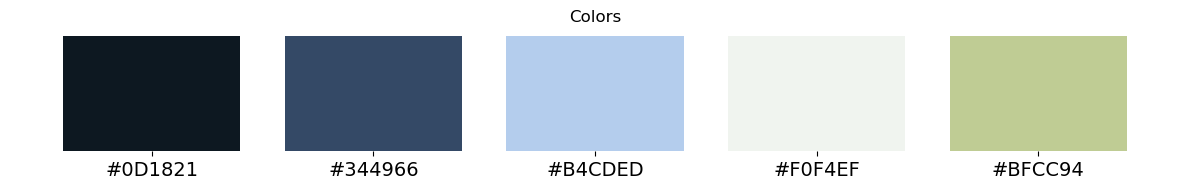

[CV] END activation=tanh, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(50

In [237]:
import matplotlib.pyplot as plt

colors = ['#0D1821', '#344966', '#B4CDED', '#F0F4EF', '#BFCC94']

fig, ax = plt.subplots(figsize=(12, 2))

num_colors = len(colors)

bars = ax.bar(range(num_colors), [1] * num_colors, color=colors)

ax.set_xticks(range(num_colors))
ax.set_xticklabels(colors, rotation=0, ha='center', fontsize=14)

ax.set_yticks([])

ax.set_title('Colors')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()

plt.show()

<!--- {"slideshow": {"slide_type": "slide"}} --->

<div style="text-align: center;">
    <h1>6. References</h1>
</div>

https://www.atlassian.com/data/charts/how-to-choose-colors-data-visualization <p>
https://www.learnui.design/tools/data-color-picker.html <p>
https://www.plainconcepts.com/data-visualization-color/<p>
https://earthobservatory.nasa.gov/resources/blogs/intro_to_color_for_visualization.pdf <p>
https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/<p>
https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace<p>
https://tung-dn.github.io/prog_class3.html<p>
https://medium.com/@jonathanbogerd/signs-of-overfitting-and-how-to-avoid-it-7aa24c01f46f </p>
https://www.kaggle.com/code/aakritsinghal/logistic-regression-visualisation </p>
https://library.virginia.edu/data/articles/visualizing-the-effects-of-logistic-regression</p>
https://stephanieevergreen.com/visualizing-regression/</p>
https://medium.com/@juliushorvath_47601/visualizing-logistic-regression-9be641903a2b </p>
https://bio304-class.github.io/bio304-fall2017/logistic-regression.html </p>
https://towardsdatascience.com/unlocking-insights-building-a-scorecard-with-logistic-regression-d05cd5eb0927 </p>
https://encord.com/blog/what-is-logistic-regression/ </p>
https://christophm.github.io/interpretable-ml-book/logistic.html </p>
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c </p>
https://medium.com/@fernando.dijkinga/explaining-l1-and-l2-regularization-in-machine-learning-2356ee91c8e3 </p>
https://dataheadhunters.com/academy/understanding-regularization-l1-vs-l2-methods-compared/ </p>
https://intapi.sciendo.com/pdf/10.2478/slgr-2014-0043 </p>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html </p>
https://www.analytixlabs.co.in/blog/random-forest-regression/ </p>
https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/#:~:text=Random%20Forest%20is%20used%20for,to%20name%20just%20a%20few!</p>
https://www.geeksforgeeks.org/random-forest-regression-in-python/ </p>
https://www.geeksforgeeks.org/ways-to-visualize-individual-decision-trees-in-a-random-forest/</p>
https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb </p>
https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/
https://www.math.mcgill.ca/yyang/resources/doc/randomforest.pdf </p>
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3 </p>
https://hsf-training.github.io/hsf-training-ml-webpage/10-Overfitting_Check/index.html </p>
